In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 37.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=222f413644475ca31d7b02ed2eb1b5e1e80a642eba126c99d37201b75541c552
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from factor_analyzer import FactorAnalyzer

In [ ]:
df = pd.read_excel('/content/World_development_measurement.xlsx')
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,54790058957,0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


# Exploratory Data Analysis

In [ ]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [ ]:
df.shape

(2704, 25)

In [ ]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [ ]:
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [ ]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

Here we can see that most of the columns have null values.

# Percentage of Null value

In [ ]:
null_percentages = df.isnull().mean() * 100
print(null_percentages)

Birth Rate                 4.400888
Business Tax Rate         47.374260
CO2 Emissions             21.412722
Country                    0.000000
Days to Start Business    36.464497
Ease of Business          93.158284
Energy Usage              33.986686
GDP                        7.766272
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Hours to do Tax           47.633136
Infant Mortality Rate      9.615385
Internet Usage             6.397929
Lending Interest          30.473373
Life Expectancy Female     5.029586
Life Expectancy Male       5.029586
Mobile Phone Usage         6.176036
Number of Records          0.000000
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Population Total           0.000000
Population Urban           0.961538
Tourism Inbound           13.609467
Tourism Outbound          17.418639
dtype: float64


Here we can see that in Ease of Business there is 93% of null values sowe are dropping it.

In [ ]:
df = df.drop(['Ease of Business'],axis = 1)

In [ ]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,54790058957,0.035,$60,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


# Removing unnecessary punctuations

In [ ]:
df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('%', '')
df['GDP'] = df['GDP'].str.replace(',', '').str.replace('$', '')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',', '').str.replace('$', '')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace(',', '').str.replace('$', '')
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace(',', '').str.replace('$', '')

<ipython-input-14-a5905a3def02>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace(',', '').str.replace('$', '')
<ipython-input-14-a5905a3def02>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',', '').str.replace('$', '')
<ipython-input-14-a5905a3def02>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Tourism Inbound'] = df['Tourism Inbound'].str.replace(',', '').str.replace('$', '')
<ipython-input-14-a5905a3def02>:5: Futu

# Copying the dataframe

In [ ]:
df1=df
df1=df1.drop("Country",axis=1)

# Imputation of null values by KNN imputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=3)
imputed_df = pd.DataFrame(knn_imputer.fit_transform(df1),columns=df1.columns)
imputed_df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,96.933333,87931.0,13.666667,26998.000000,5.041749e+10,0.035,60.0,205.000000,0.034,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,40.533333,9542.0,22.000000,7499.000000,9.129595e+09,0.034,22.0,241.333333,0.128,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,40.533333,1617.0,22.000000,1983.000000,2.359122e+09,0.043,15.0,241.333333,0.090,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,40.533333,4276.0,22.000000,1836.000000,5.788312e+09,0.047,152.0,241.333333,0.054,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,54.633333,1041.0,36.666667,13489.333333,2.610959e+09,0.051,12.0,296.000000,0.096,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


In [ ]:
new_df=pd.concat([df["Country"], imputed_df], axis=1)
new_df

,Country,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Algeria,0.020000,96.933333,87931.000000,13.666667,2.699800e+04,5.041749e+10,0.035000,60.0,205.000000,...,67.000000,0.000000,1.0,0.342,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08
1,Angola,0.050000,40.533333,9542.000000,22.000000,7.499000e+03,9.129595e+09,0.034000,22.0,241.333333,...,44.000000,0.000000,1.0,0.476,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08
2,Benin,0.043000,40.533333,1617.000000,22.000000,1.983000e+03,2.359122e+09,0.043000,15.0,241.333333,...,53.000000,0.000000,1.0,0.454,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07
3,Botswana,0.027000,40.533333,4276.000000,22.000000,1.836000e+03,5.788312e+09,0.047000,152.0,241.333333,...,49.000000,0.100000,1.0,0.383,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08
4,Burkina Faso,0.046000,54.633333,1041.000000,36.666667,1.348933e+04,2.610959e+09,0.051000,12.0,296.000000,...,49.000000,0.000000,1.0,0.468,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,Turks and Caicos Islands,0.011667,48.933333,160.000000,26.000000,7.800000e+01,2.741753e+09,0.033333,2796.0,132.000000,...,76.666667,0.433333,1.0,0.291,0.638667,0.070333,32427.0,0.911,5.036667e+08,1.403333e+08
2700,United States,0.013000,46.400000,79142.666667,5.000000,2.132446e+06,1.624460e+13,0.179000,8895.0,175.000000,...,76.000000,1.000000,1.0,0.196,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,Uruguay,0.015000,41.900000,590.333333,7.000000,2.226300e+04,5.000435e+10,0.089000,1308.0,310.000000,...,74.000000,1.500000,1.0,0.220,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,"Venezuela, RB",0.020000,61.900000,79142.666667,144.000000,2.163900e+04,3.812862e+11,0.046000,593.0,792.000000,...,72.000000,1.000000,1.0,0.288,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09


# Changing the dtype

In [ ]:
new_df.dtypes

Country                    object
Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records         float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total          float64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [ ]:
new_df['Business Tax Rate'] = new_df['Business Tax Rate'].astype(np.float64)
new_df['CO2 Emissions'] = new_df['CO2 Emissions'].astype(np.int64)
new_df['GDP'] = new_df['GDP'].astype(np.int64)
new_df['Days to Start Business'] = new_df['Days to Start Business'].astype(np.int64)
new_df['Energy Usage'] = new_df['Energy Usage'].astype(np.int64)
new_df['Health Exp/Capita'] = new_df['Health Exp/Capita'].astype(np.int64)
new_df['Hours to do Tax'] = new_df['Hours to do Tax'].astype(np.int64)
new_df['Life Expectancy Female'] = new_df['Life Expectancy Female'].astype(np.int64)
new_df['Life Expectancy Male'] = new_df['Life Expectancy Male'].astype(np.int64)
new_df['Tourism Inbound'] = new_df['Tourism Inbound'].astype(np.int64)
new_df['Tourism Outbound'] = new_df['Tourism Outbound'].astype(np.int64)

In [ ]:
new_df.dtypes

Country                    object
Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions               int64
Days to Start Business      int64
Energy Usage                int64
GDP                         int64
Health Exp % GDP          float64
Health Exp/Capita           int64
Hours to do Tax             int64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female      int64
Life Expectancy Male        int64
Mobile Phone Usage        float64
Number of Records         float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total          float64
Population Urban          float64
Tourism Inbound             int64
Tourism Outbound            int64
dtype: object

# Checking Duplicates

In [ ]:
new_df.duplicated().sum()

0

# Correlation Matrix

<ipython-input-22-f805b25eca0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_df.corr()


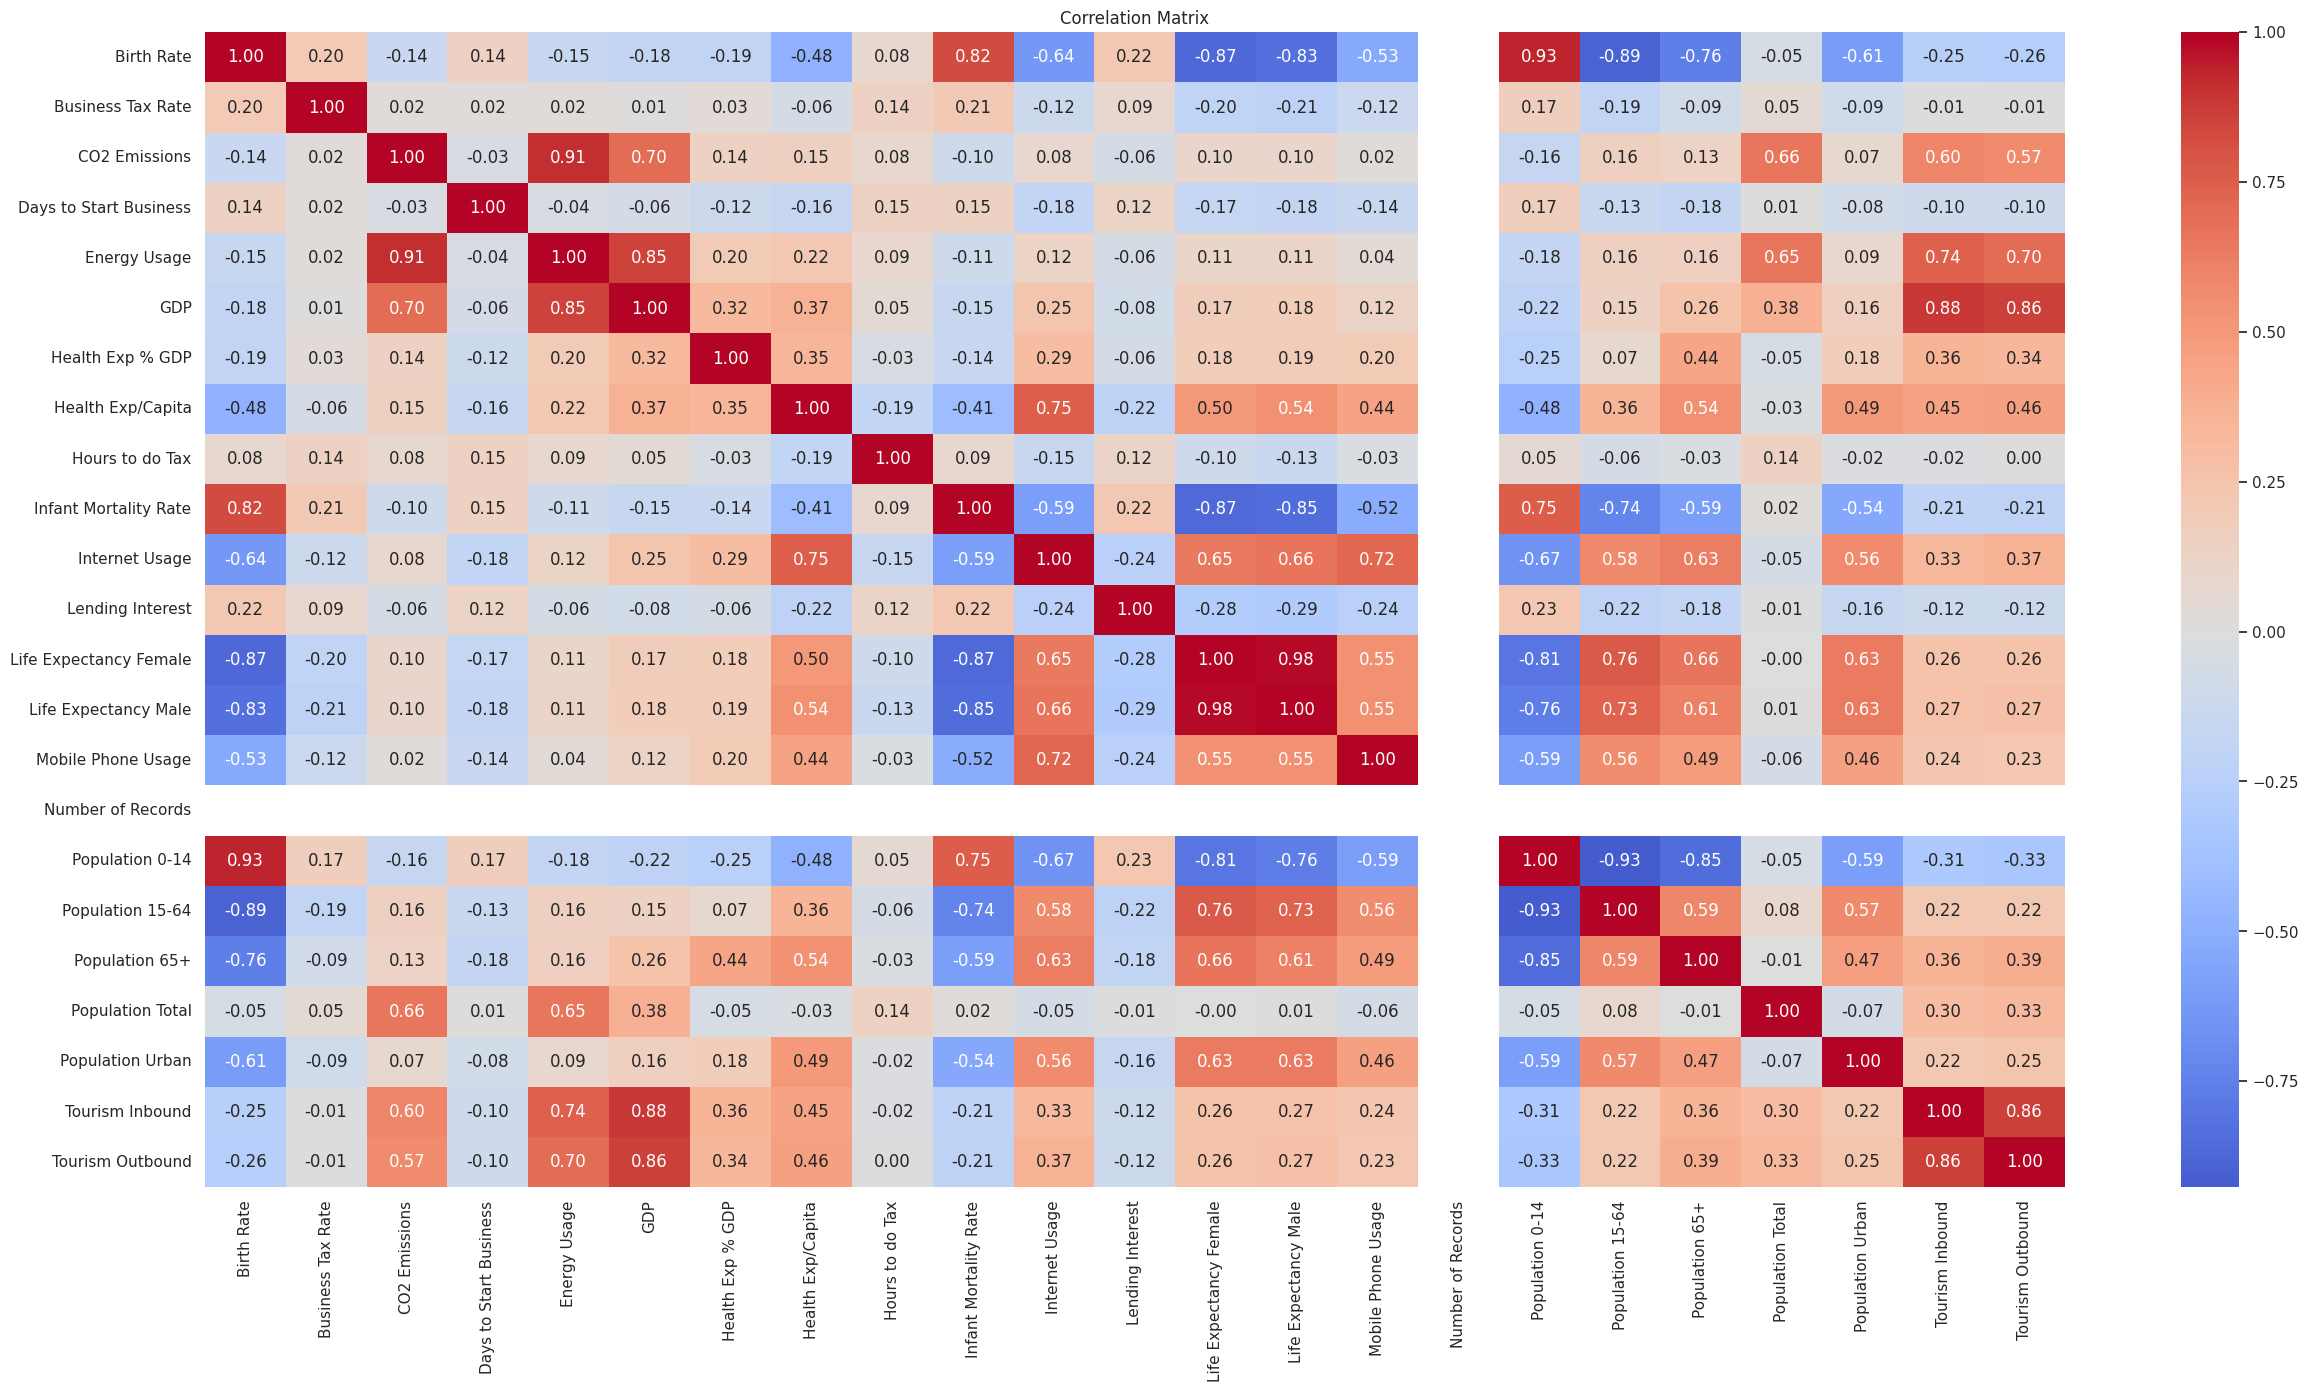

In [ ]:
corr_matrix = new_df.corr()

sns.set(style="white")

plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the above correlation Matrix plot we can see that **Business Tax Rate, Days to Start Business, Hours to do Tax, Lending Interest, Number of Records, Health Exp % GDP** are not significant so we can drop it.

In [ ]:
corr_matrix = new_df.corr()

# Create correlation heatmap

# Extract highly correlated variable names
high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)].stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr.sort_values(by='Correlation', ascending=False)

# Display highly correlated variable names
print('Highly Correlated Variable Names:')
print(high_corr[['Variable 1', 'Variable 2']])

Highly Correlated Variable Names:
                Variable 1              Variable 2
9   Life Expectancy Female    Life Expectancy Male
10    Life Expectancy Male  Life Expectancy Female
1               Birth Rate         Population 0-14
11         Population 0-14              Birth Rate
2            CO2 Emissions            Energy Usage
3             Energy Usage           CO2 Emissions
6                      GDP         Tourism Inbound
12         Tourism Inbound                     GDP
13         Tourism Inbound        Tourism Outbound
15        Tourism Outbound         Tourism Inbound
7                      GDP        Tourism Outbound
14        Tourism Outbound                     GDP
4             Energy Usage                     GDP
5                      GDP            Energy Usage
0               Birth Rate   Infant Mortality Rate
8    Infant Mortality Rate              Birth Rate


<ipython-input-23-fa822a12f19c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_df.corr()


In [ ]:
new_df = new_df.drop(['Business Tax Rate', 'Days to Start Business', 'Hours to do Tax', 'Lending Interest', 'Number of Records','Health Exp % GDP'],axis = 1)

In [ ]:
new_df

,Country,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Algeria,0.020000,87931,26998,50417493295,60,0.034,0.000000,71,67,0.000000,0.342,0.619000,0.039000,31719449.0,0.599,102000000,193000000
1,Angola,0.050000,9542,7499,9129594819,22,0.128,0.000000,47,44,0.000000,0.476,0.499000,0.025000,13924930.0,0.324,34000000,146000000
2,Benin,0.043000,1617,1983,2359122303,15,0.090,0.000000,57,53,0.000000,0.454,0.517000,0.029000,6949366.0,0.383,77000000,50000000
3,Botswana,0.027000,4276,1836,5788311645,152,0.054,0.000000,52,49,0.100000,0.383,0.587000,0.029000,1755375.0,0.532,227000000,209000000
4,Burkina Faso,0.046000,1041,13489,2610959139,12,0.096,0.000000,52,49,0.000000,0.468,0.505000,0.028000,11607944.0,0.178,23000000,30000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,Turks and Caicos Islands,0.011667,160,78,2741752641,2796,0.004,0.466667,82,76,0.433333,0.291,0.638667,0.070333,32427.0,0.911,503666666,140333333
2700,United States,0.013000,79142,2132446,16244600000000,8895,0.006,0.800000,81,76,1.000000,0.196,0.667000,0.136000,313873685.0,0.811,200092000000,126573000000
2701,Uruguay,0.015000,590,22263,50004354667,1308,0.010,0.500000,80,74,1.500000,0.220,0.639000,0.140000,3395253.0,0.948,2222000000,1028000000
2702,"Venezuela, RB",0.020000,79142,21639,381286223859,593,0.013,0.500000,78,72,1.000000,0.288,0.652000,0.060000,29954782.0,0.889,904000000,3202000000


# Distplot and Boxplot

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


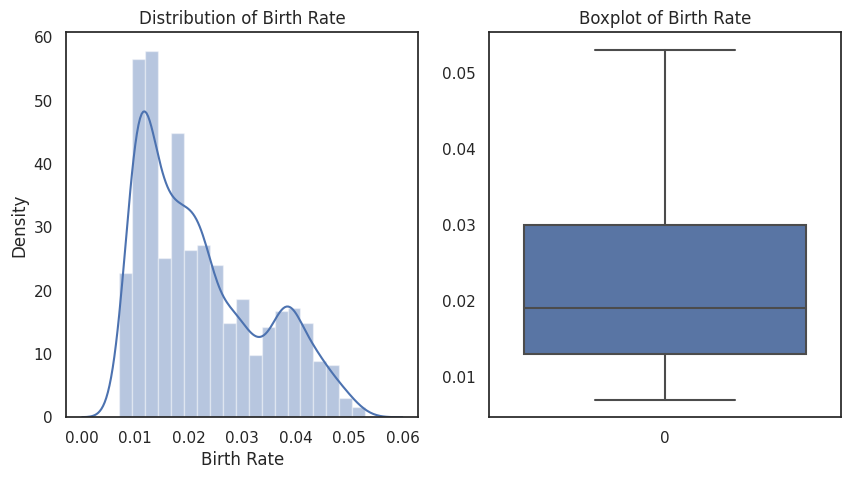

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


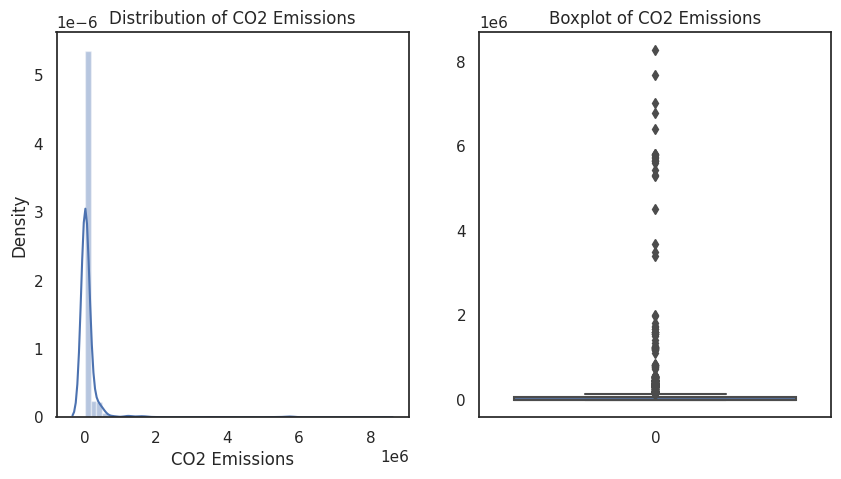

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


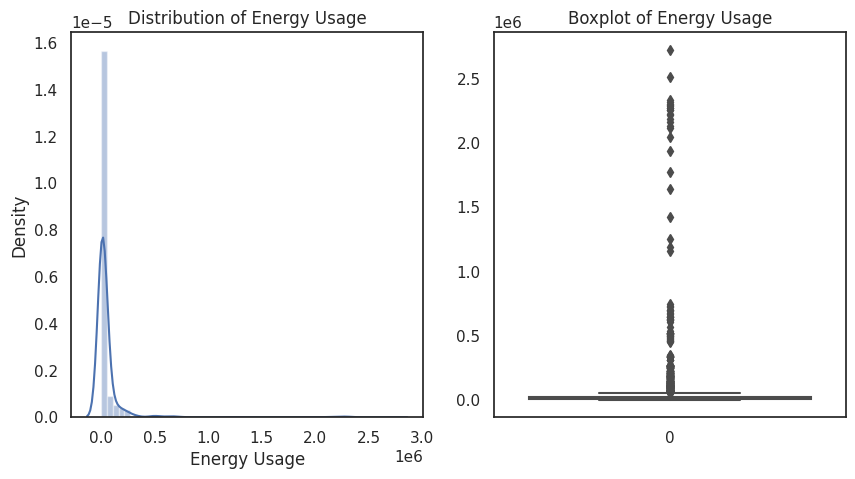

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


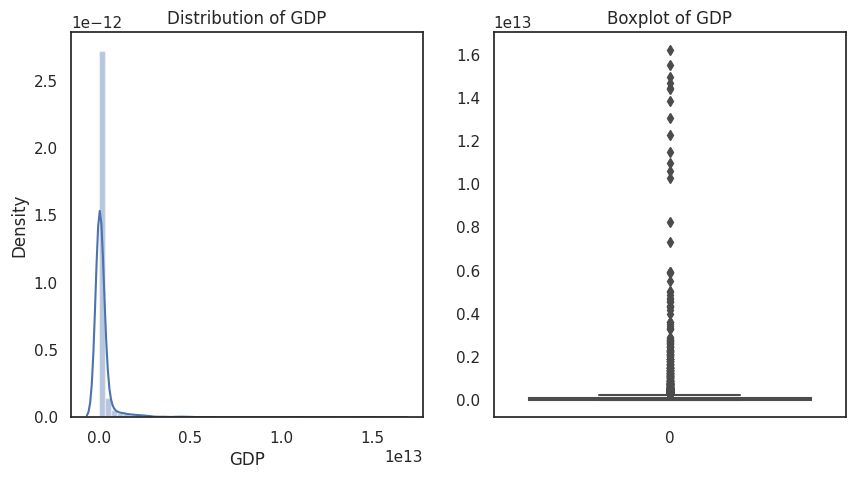

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


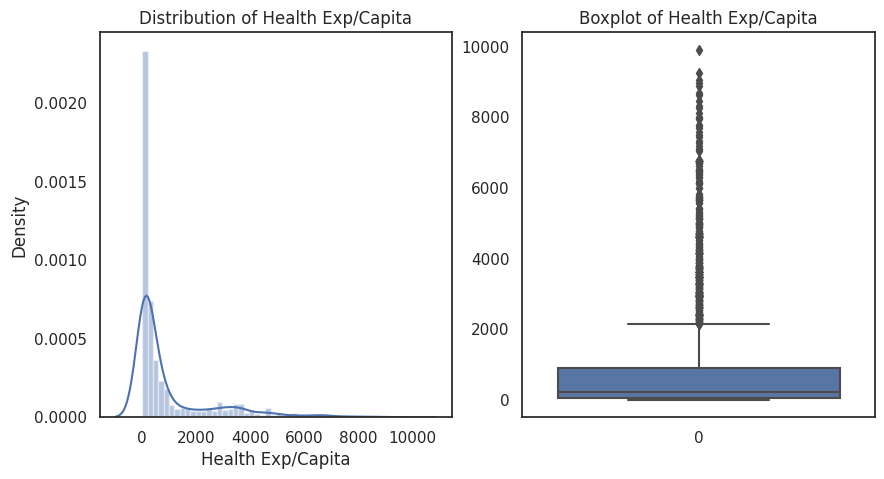

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


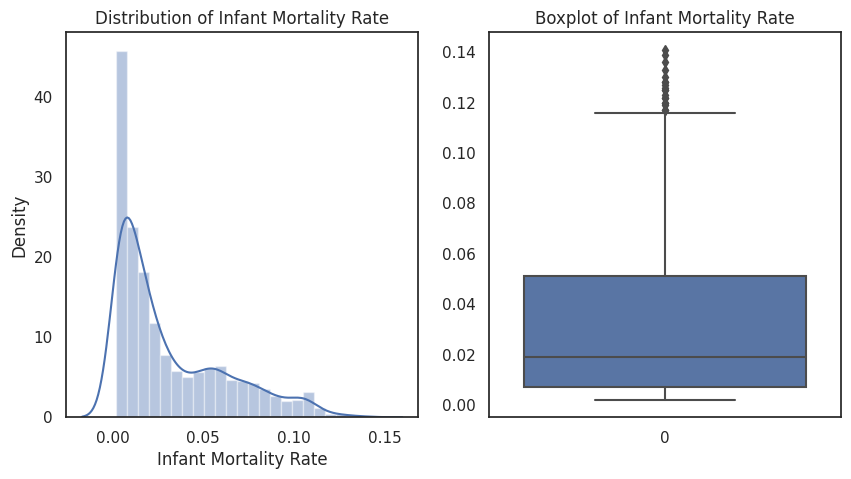

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


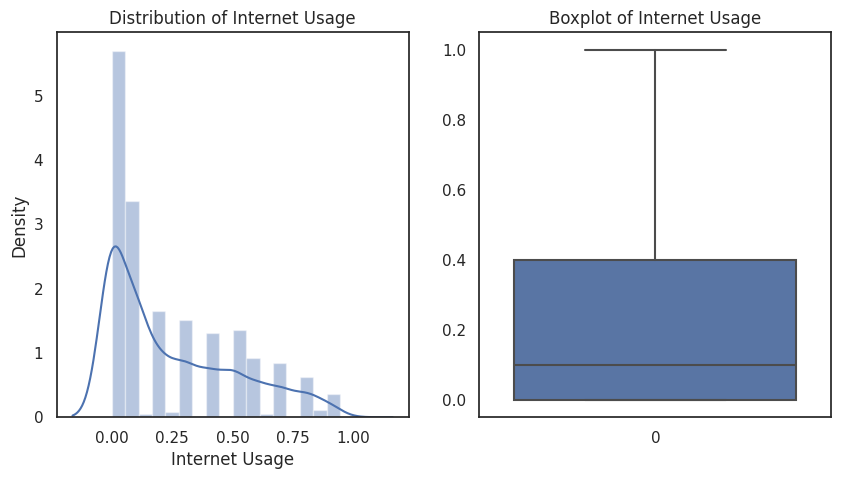

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


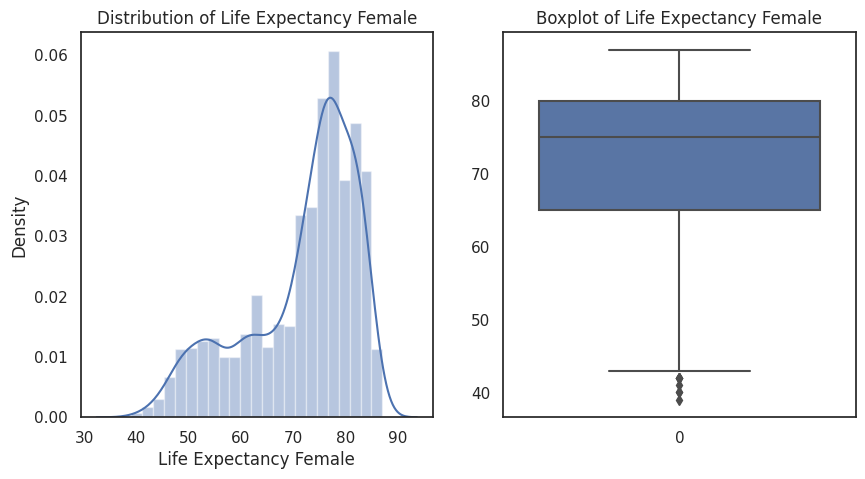

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


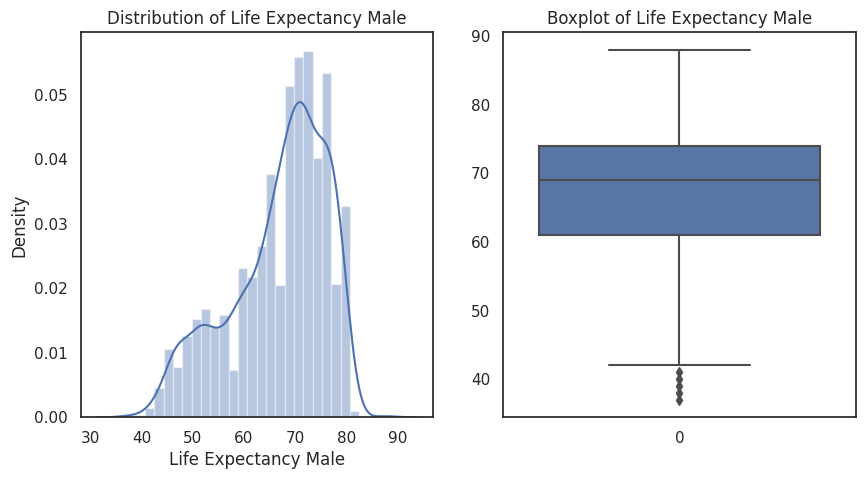

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


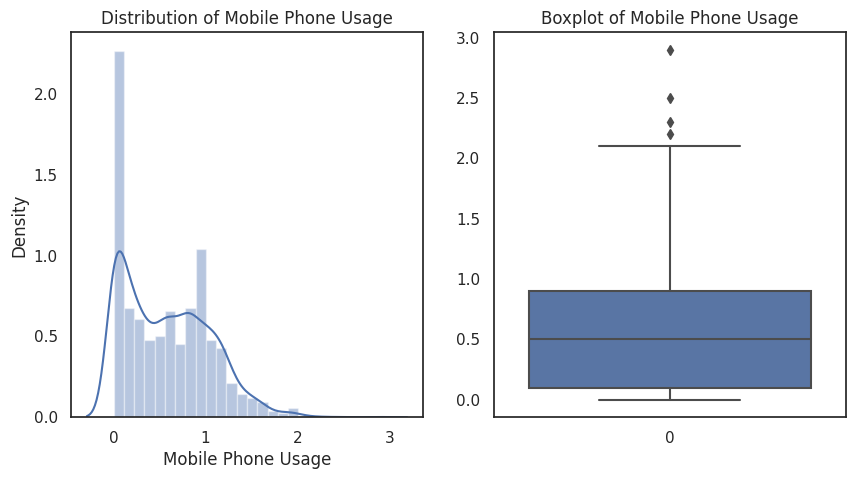

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


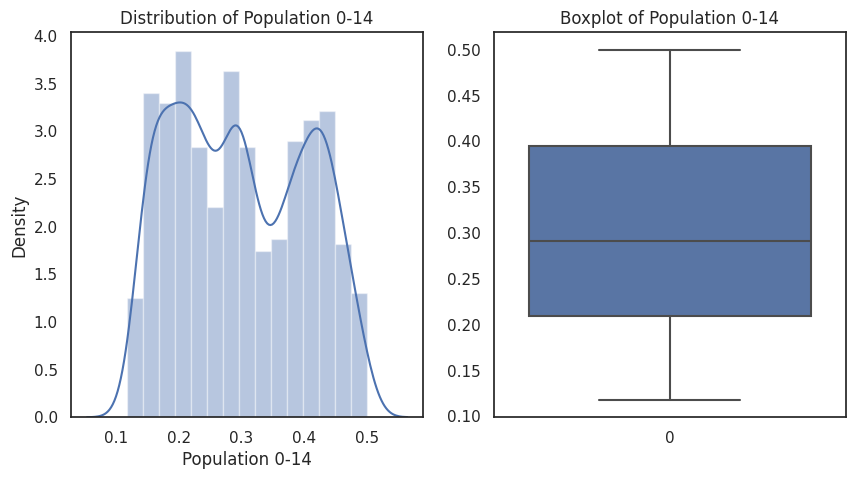

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


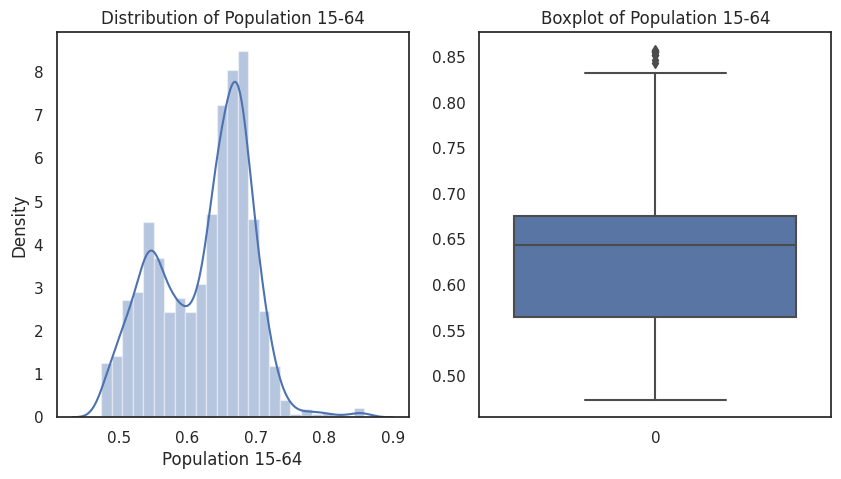

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


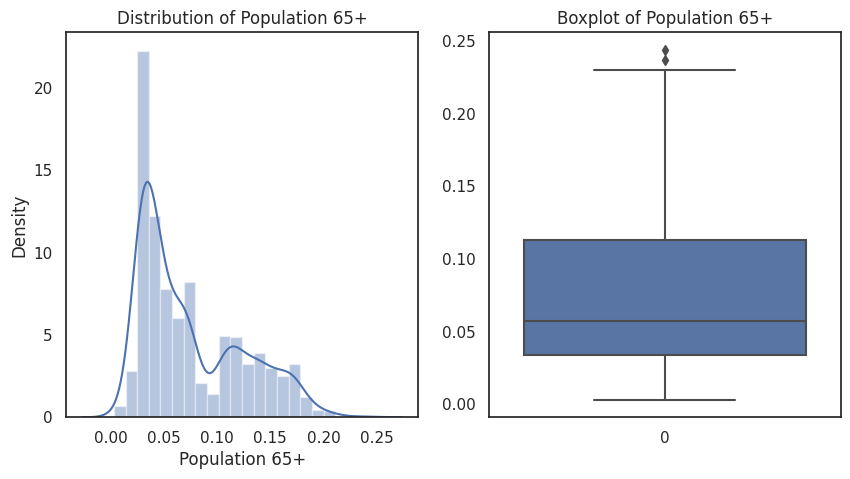

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


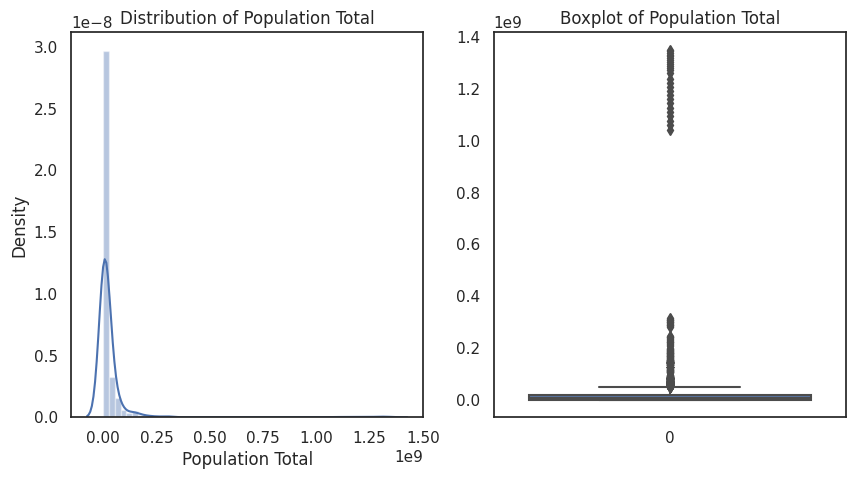

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


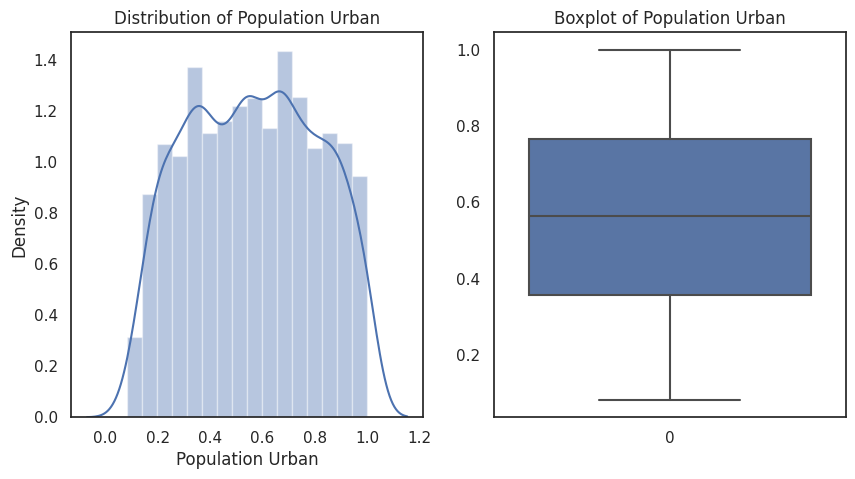

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


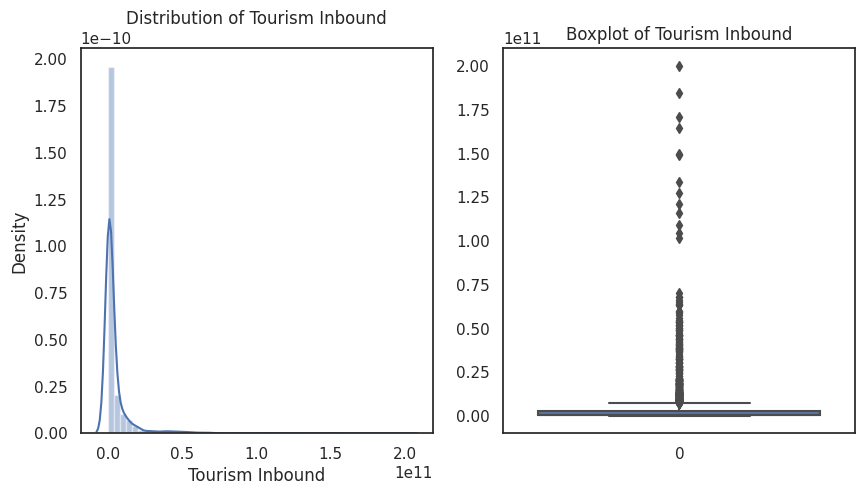

<ipython-input-26-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


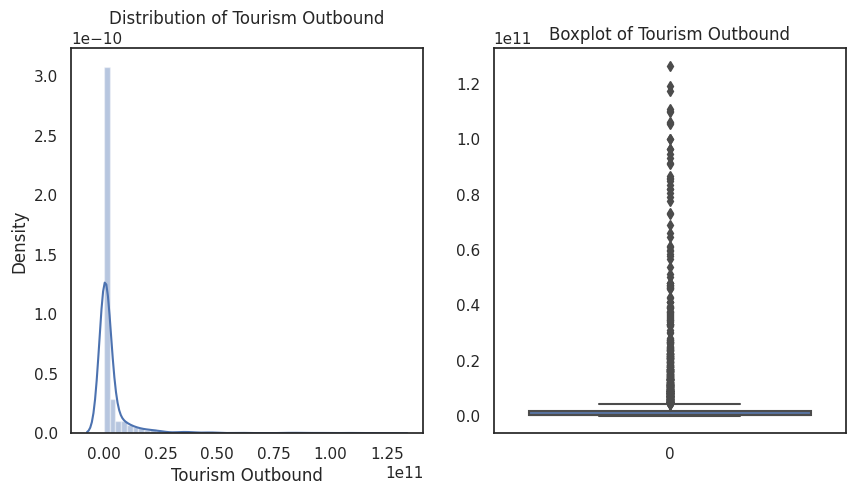

In [ ]:
# Remove the 'Country' column
num_cols = [col for col in new_df.columns if col != 'Country' and new_df[col].dtype != 'object']
num_df = new_df[num_cols]

# Loop over all numerical columns and plot the distributions
for col in num_cols:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    
    # Plot the distribution
    sns.distplot(num_df[col], ax=axs[0])
    axs[0].set_title(f'Distribution of {col}')
    
    # Plot the boxplot
    sns.boxplot(num_df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')
    
    # Show the plots
    plt.show()

# IQR with capping

In [ ]:
for col in new_df.columns:
    if col != 'Country':
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df[col] = np.where(new_df[col] < lower_bound, lower_bound, new_df[col])
        new_df[col] = np.where(new_df[col] > upper_bound, upper_bound, new_df[col])

Any value below the lower bound is replaced with the lower bound, and any value above the upper bound is replaced with the upper bound. This process is known as "capping" and is a common way to handle outliers.

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


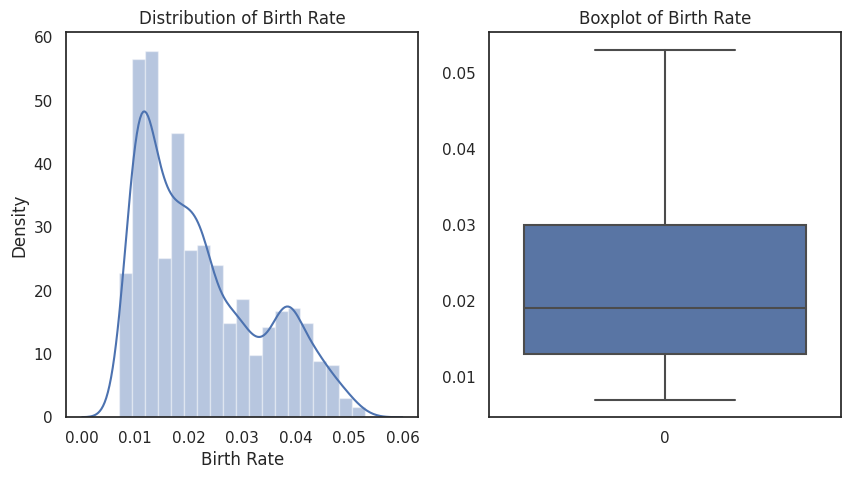

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


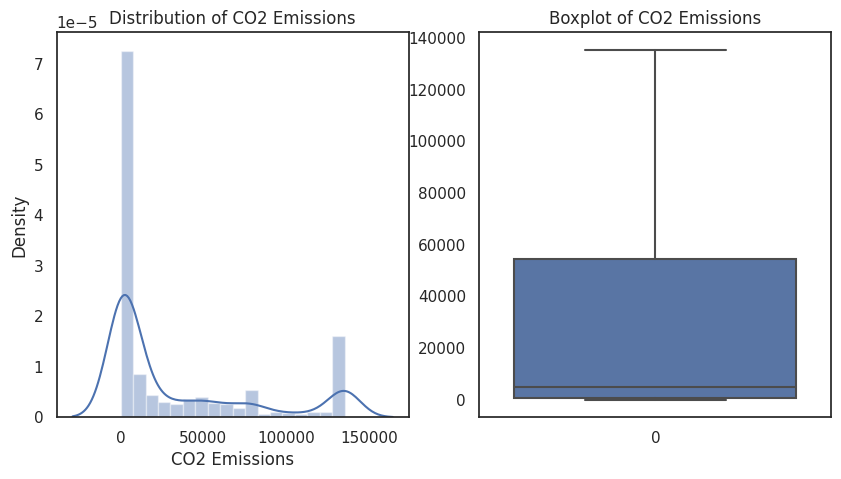

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


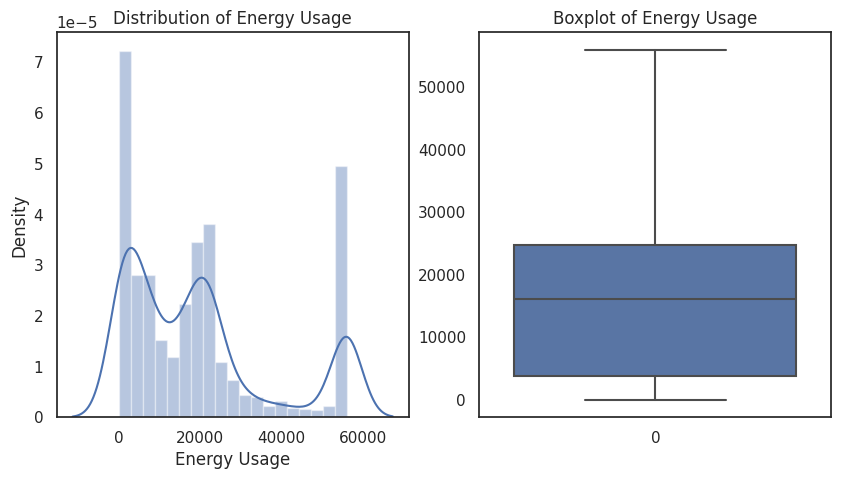

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


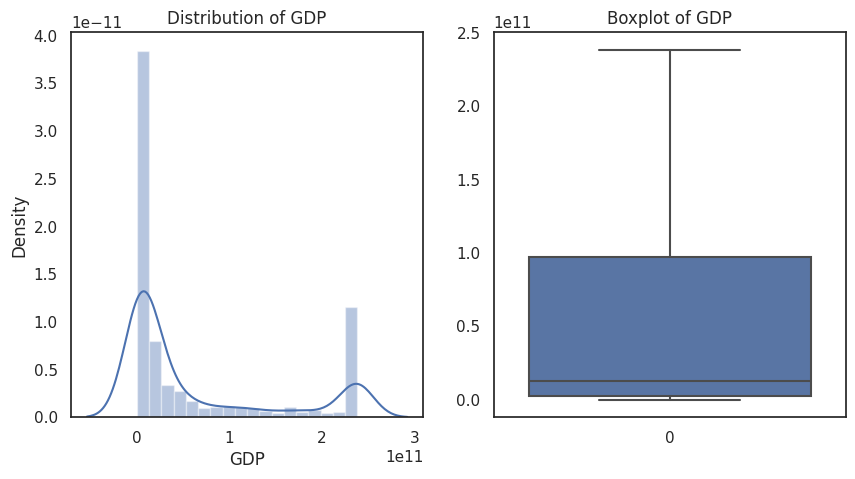

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


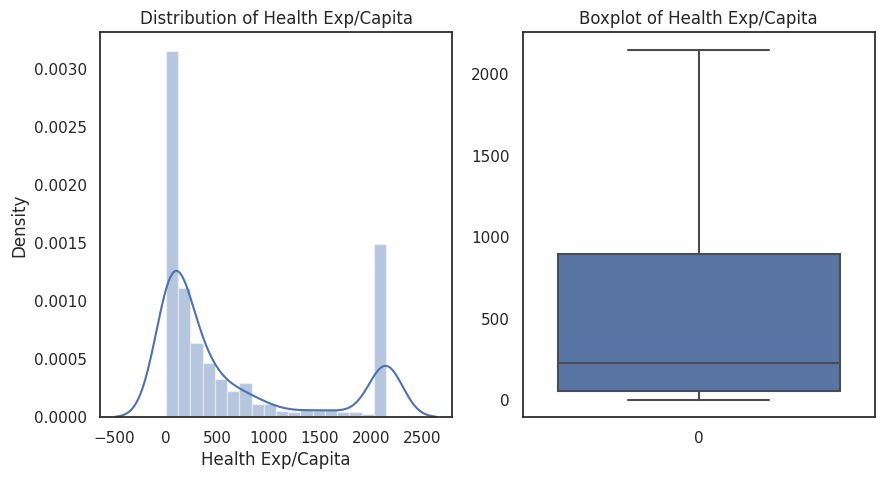

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


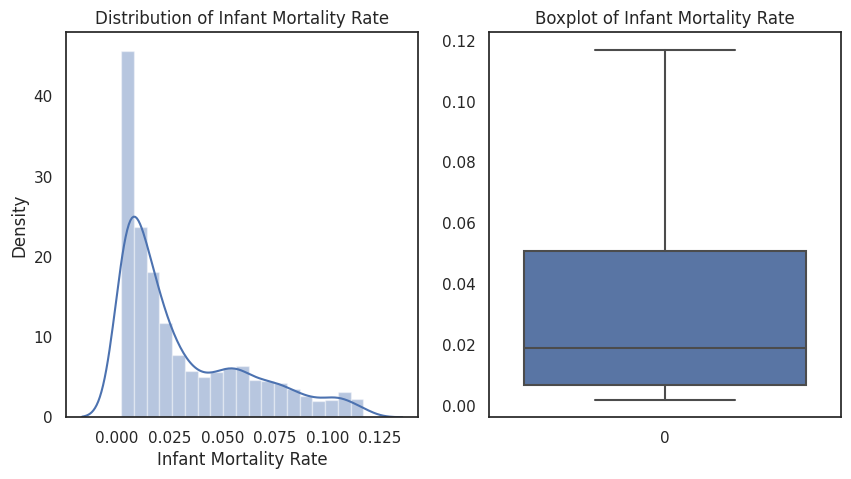

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


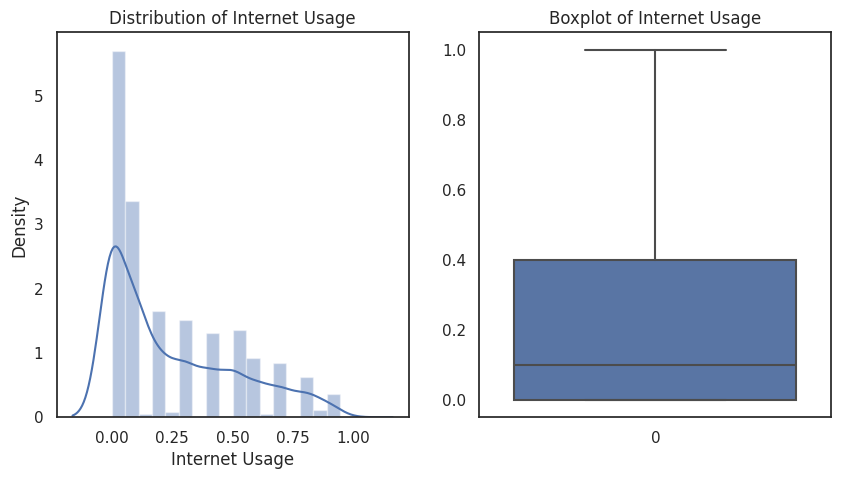

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


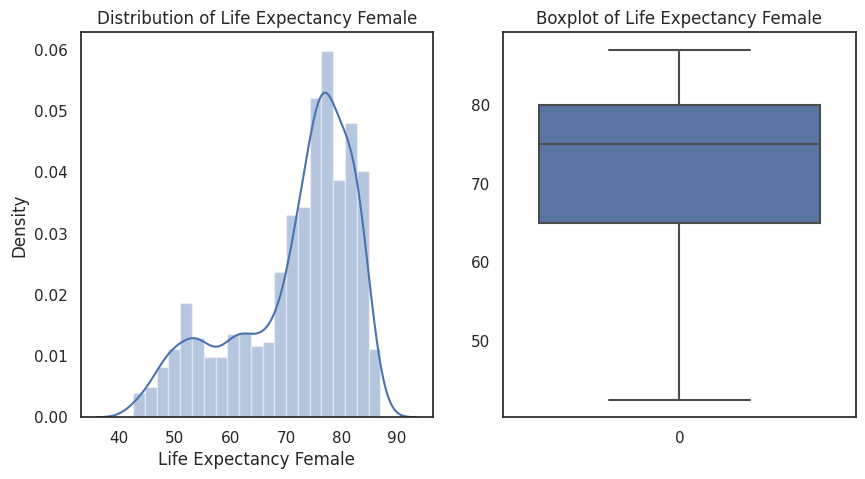

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


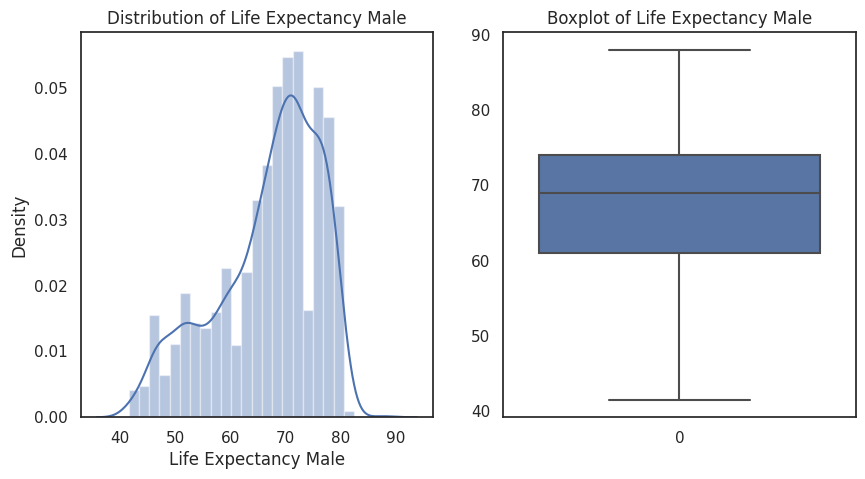

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


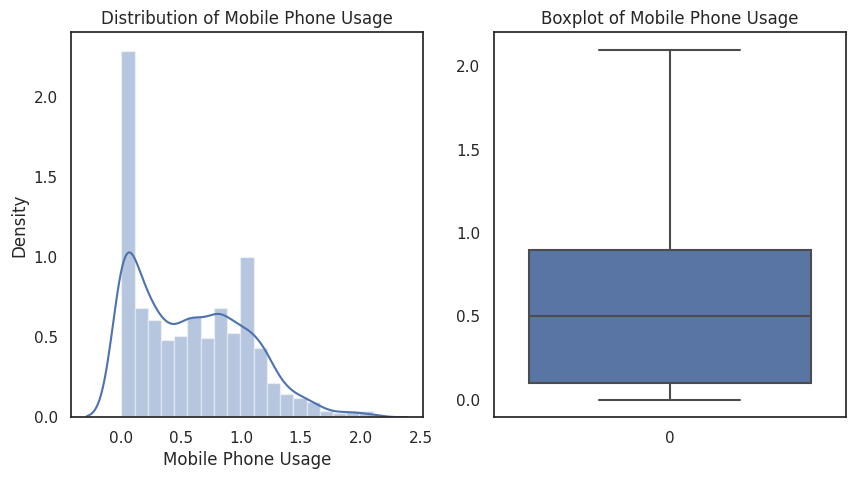

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


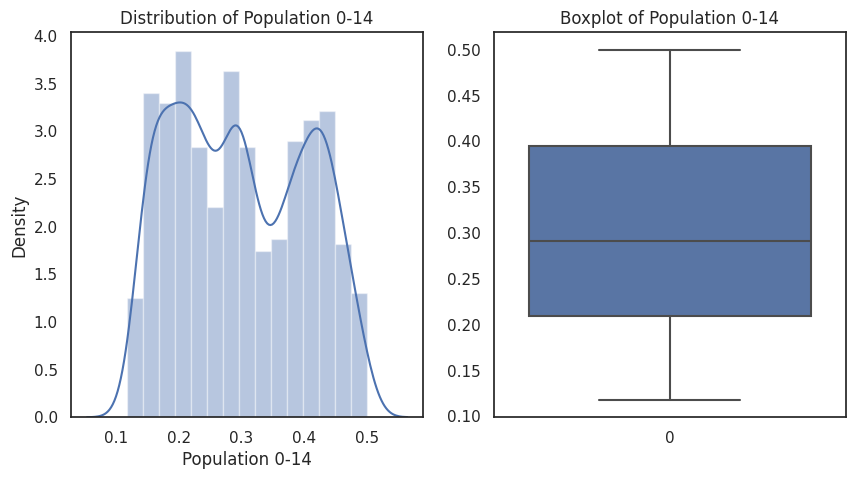

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


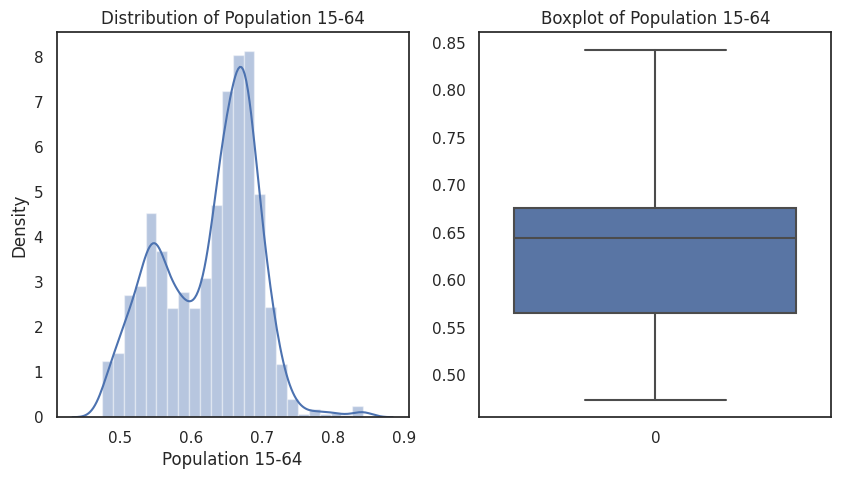

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


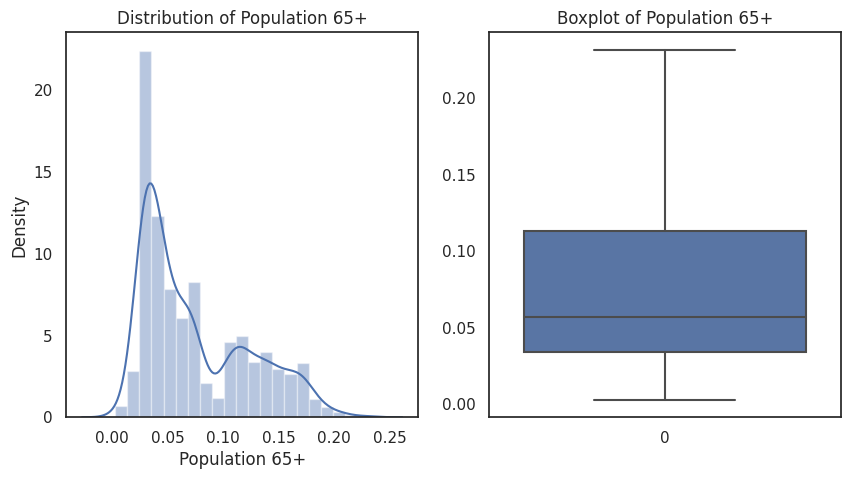

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


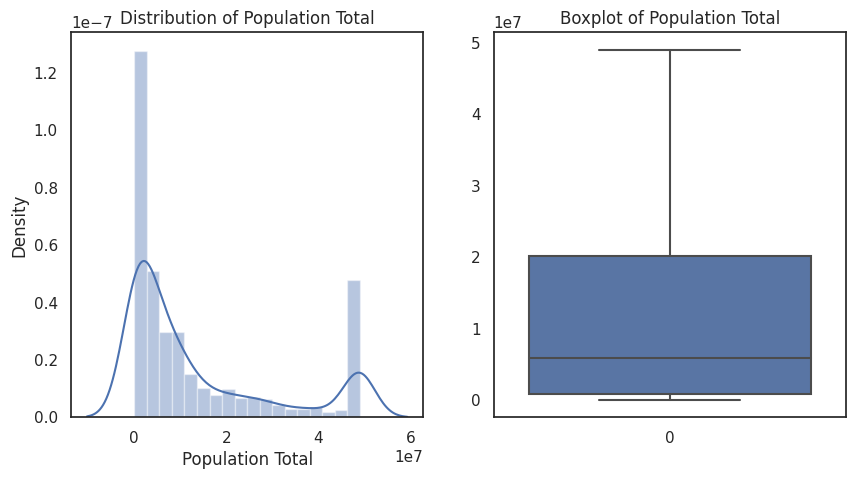

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


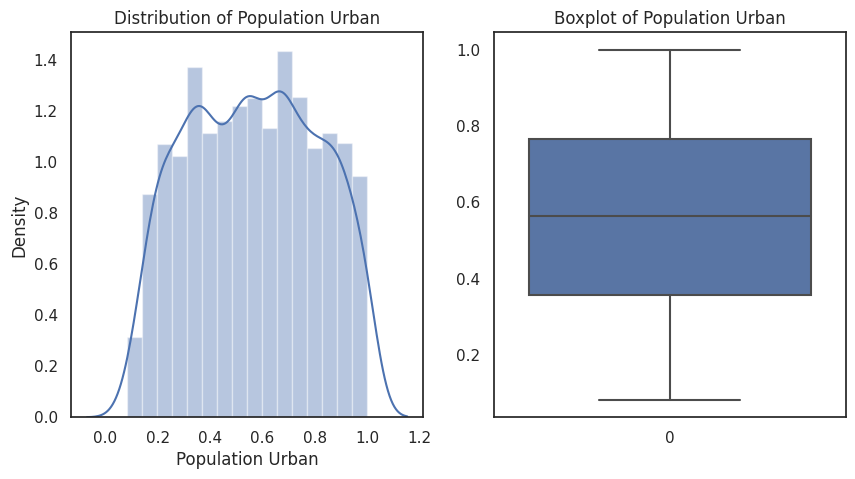

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


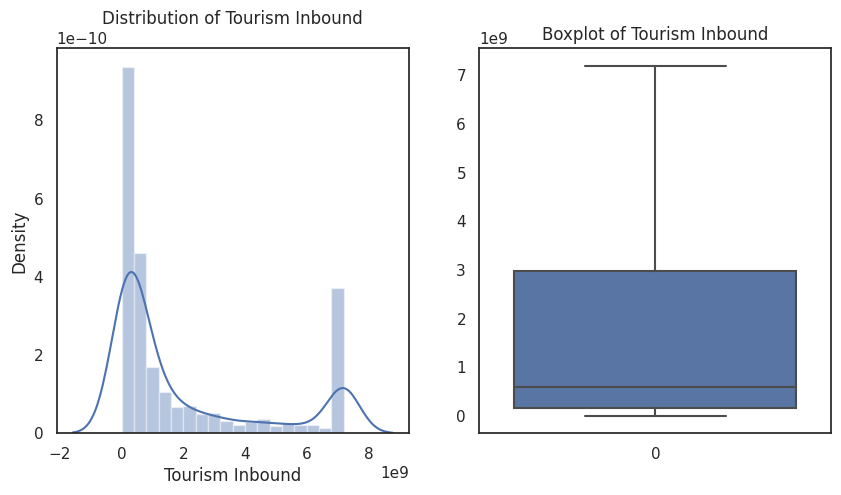

<ipython-input-28-a96fb26a94c8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[col], ax=axs[0])


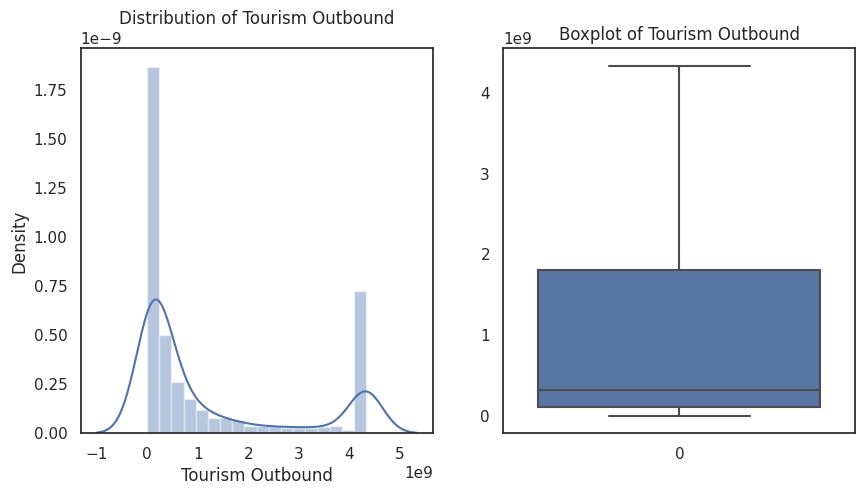

In [ ]:
# Remove the 'Country' column
num_cols = [col for col in new_df.columns if col != 'Country' and new_df[col].dtype != 'object']
num_df = new_df[num_cols]

# Loop over all numerical columns and plot the distributions
for col in num_cols:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    
    # Plot the distribution
    sns.distplot(num_df[col], ax=axs[0])
    axs[0].set_title(f'Distribution of {col}')
    
    # Plot the boxplot
    sns.boxplot(num_df[col], ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')
    
    # Show the plots
    plt.show()

# **Normalization**

In [ ]:
normalize =MinMaxScaler()
new_df1 = normalize.fit_transform(new_df.iloc[:,1:].to_numpy())
df_norm1 = pd.DataFrame(new_df1, columns = new_df.columns[1:])
df_norm1

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.282609,0.649592,0.482204,0.211326,0.027008,0.278261,0.000000,0.640449,0.548387,0.000000,0.586387,0.393487,0.157549,0.646741,0.563181,0.014088,0.044526
1,0.934783,0.070446,0.133834,0.038050,0.009313,1.000000,0.000000,0.101124,0.053763,0.000000,0.937173,0.067843,0.096280,0.283705,0.263617,0.004631,0.033672
2,0.782609,0.011895,0.035285,0.009636,0.006054,0.765217,0.000000,0.325843,0.247312,0.000000,0.879581,0.116689,0.113786,0.141393,0.327887,0.010612,0.011501
3,0.434783,0.031540,0.032659,0.024027,0.069849,0.452174,0.000000,0.213483,0.161290,0.047619,0.693717,0.306649,0.113786,0.035427,0.490196,0.031473,0.048221
4,0.847826,0.007639,0.240852,0.010693,0.004657,0.817391,0.000000,0.213483,0.161290,0.000000,0.916230,0.084125,0.109409,0.236435,0.104575,0.003101,0.006882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.101449,0.001130,0.001251,0.011242,1.000000,0.017391,0.466667,0.887640,0.741935,0.206349,0.452880,0.446857,0.294675,0.000276,0.903050,0.069951,0.032363
2700,0.130435,0.584657,1.000000,1.000000,1.000000,0.034783,0.800000,0.865169,0.741935,0.476190,0.204188,0.523745,0.582057,1.000000,0.794118,1.000000,1.000000
2701,0.173913,0.004307,0.397609,0.209592,0.608149,0.069565,0.500000,0.842697,0.698925,0.714286,0.267016,0.447761,0.599562,0.068883,0.943355,0.308930,0.237364
2702,0.282609,0.584657,0.386460,1.000000,0.275204,0.095652,0.500000,0.797753,0.655914,0.476190,0.445026,0.483039,0.249453,0.610739,0.879085,0.125628,0.739437


# Factor Analysis

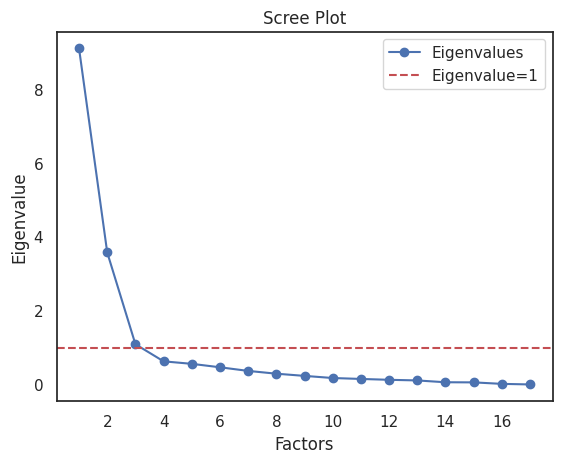

                Factor 1  Factor 2  Factor 3
SS loadings     6.217122  4.361910  2.566645
Proportion Var  0.365713  0.256583  0.150979
Cumulative Var  0.365713  0.622296  0.773275


In [ ]:
# Remove 'Country' column
new_df.drop('Country', axis=1, inplace=True)

# Perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(new_df)

# Create scree plot
ev, v = fa.get_eigenvalues()
plt.plot(range(1, new_df.shape[1]+1), ev, 'o-', label='Eigenvalues')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue=1')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.legend()
plt.show()

# Perform factor analysis with selected factors
fa = FactorAnalyzer(n_factors=(ev >= 1).sum(), rotation='varimax')
fa.fit(new_df)

# Get factor loadings
loads = fa.loadings_


# Get variance explained by each factor
variance = fa.get_factor_variance()
variance_table = pd.DataFrame(variance, index=['SS loadings', 'Proportion Var', 'Cumulative Var'], columns=['Factor '+str(i+1) for i in range(fa.n_factors)])
print(variance_table)


The selection of **3 factors** has **explained 77% of total variance of the 18 indicators.** The higher the percentage, the better the model is.

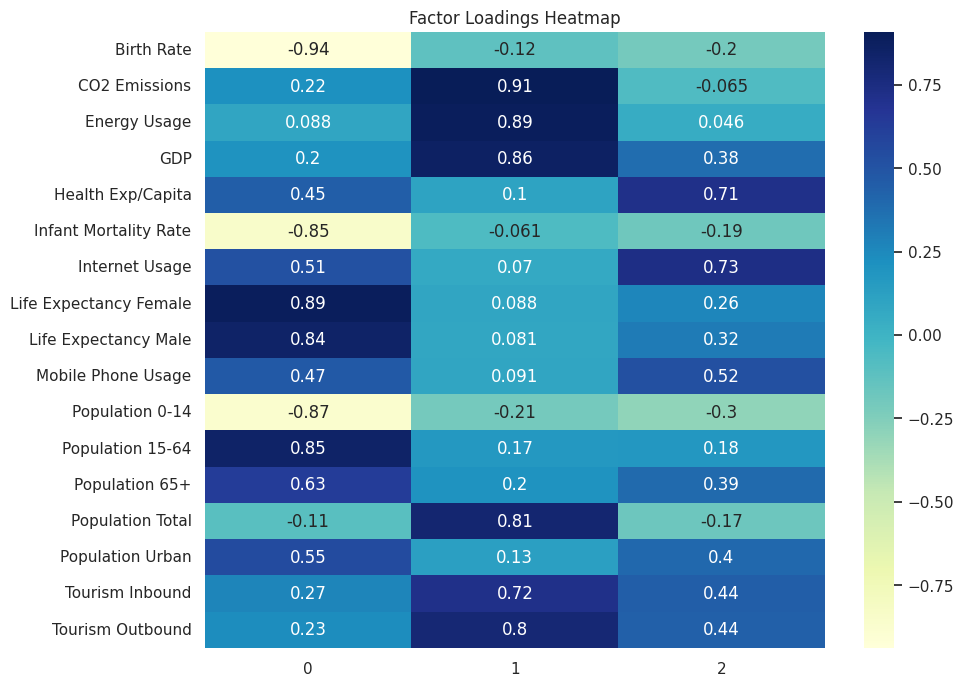

In [ ]:
# Create heatmap of loadings
plt.figure(figsize=(10,8))
sns.heatmap(loads, annot=True, cmap="YlGnBu", yticklabels=new_df.columns.values)
plt.title('Factor Loadings Heatmap')
plt.show()

**Factor 0 : Life Expectancy** (Life Expectancy Female, Life Expectancy male, population 15-64.)
 
**Factor 1 : Economy growth** (CO2, Energy Usage, GDP, Population total, Tourism Inbound and Tourism Outbound.)

**Factor 2 : Access to essential services in society** (Health Exp/Capita, Internet Usage and Mobile Phone Usage.)

In [ ]:
new_df = pd.concat([df['Country'], new_df], axis=1)
new_df = new_df.reset_index(drop=True)

# **Hopkins statistic**

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan


def hopkins(X):
    """
    Perform Hopkins statistic on a given dataset.
    """
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) # number of random points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    
    return H

# Perform Hopkins test
hopkins_statistic = hopkins(new_df.drop('Country', axis=1))
print("Hopkins Statistic:", hopkins_statistic)


Hopkins Statistic: 0.8599764330822689


# Model Building

## 1) K-Means Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

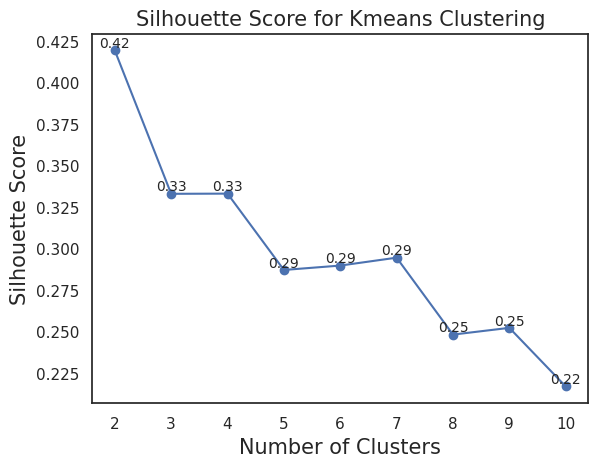

In [ ]:
from sklearn.metrics import silhouette_score

# Define the range of number of clusters to try
k_range = range(2, 11)

# Compute the silhouette scores for each number of clusters
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_norm1)
    silhouette_scores.append(silhouette_score(df_norm1, kmeans.labels_))

# Plot the silhouette scores with markers for each point
plt.plot(k_range, silhouette_scores, marker='o')
for x, y in zip(k_range, silhouette_scores):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)
plt.title('Silhouette Score for Kmeans Clustering',fontsize=15)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Silhouette Score',fontsize=15)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

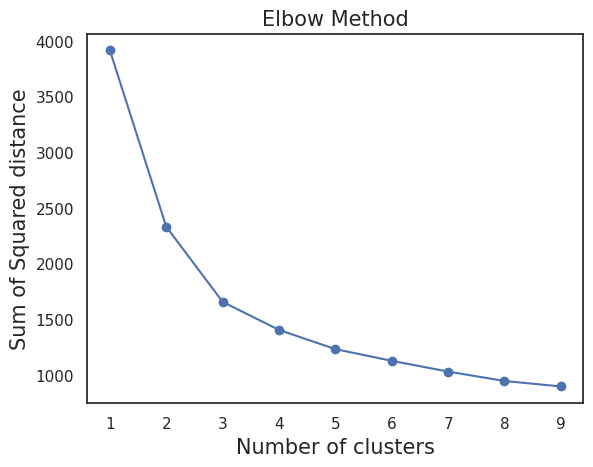

In [ ]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_norm1)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
# Build the cluster algorithmn
cluster_km = KMeans(n_clusters=4, max_iter=100, random_state = 42)
cluster_km.fit(df_norm1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=4, random_state=42)

In [ ]:
cluster_km.labels_

array([3, 3, 3, ..., 0, 1, 0], dtype=int32)

In [ ]:
new_df['clusterid_KM']=cluster_km.labels_

In [ ]:
cluster_km.cluster_centers_  #Giving the average values of centroids for all the features and for all the 4 clusters

array([[0.18475848, 0.08522466, 0.16787611, 0.08139581, 0.37973193,
        0.10246694, 0.3350777 , 0.7923433 , 0.65558659, 0.34740912,
        0.33443342, 0.51689567, 0.3796197 , 0.06990027, 0.62795574,
        0.15630423, 0.12585656],
       [0.27551419, 0.85008681, 0.8631119 , 0.73943598, 0.11985807,
        0.20596199, 0.18093812, 0.68646976, 0.55534093, 0.27972626,
        0.42436593, 0.4901811 , 0.27243544, 0.82565552, 0.56626942,
        0.58464293, 0.69166475],
       [0.10722281, 0.59634048, 0.71181825, 0.89880131, 0.88522672,
        0.05712266, 0.6134598 , 0.88861484, 0.75813737, 0.49941928,
        0.15410973, 0.55554085, 0.61787432, 0.43693792, 0.7831565 ,
        0.90105572, 0.95121053],
       [0.60418764, 0.07545366, 0.23185518, 0.04652215, 0.03786582,
        0.51802288, 0.03607018, 0.39957422, 0.33898132, 0.1077193 ,
        0.77575916, 0.20922374, 0.13809513, 0.24963427, 0.29878225,
        0.0582026 , 0.0530443 ]])

In [ ]:
new_df.groupby('clusterid_KM').agg(['mean']).reset_index()

<ipython-input-40-a10abba88ef0>:1: FutureWarning: ['Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_df.groupby('clusterid_KM').agg(['mean']).reset_index()


,clusterid_KM,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.015499,11542.392008,9404.382612,1.945797e+10,817.474310,0.013784,0.335078,77.759277,71.984776,0.729559,0.245754,0.664476,0.089743,3.445097e+06,0.658463,1.124574e+09,5.451652e+08
1,1,0.019674,115068.586826,48318.207335,1.762548e+11,259.395210,0.025686,0.180938,73.047904,67.323353,0.587425,0.280108,0.654632,0.065251,4.048908e+07,0.601835,4.204458e+09,2.995143e+09
2,2,0.011932,80723.324526,39849.980014,2.142281e+11,1903.024390,0.008569,0.613460,82.043360,76.753388,1.048780,0.176870,0.678717,0.144184,2.143576e+07,0.800938,6.479561e+09,4.118989e+09
3,3,0.034793,10219.861053,12985.427105,1.114833e+10,83.316842,0.061573,0.036070,60.281053,57.262632,0.226211,0.414340,0.551099,0.034555,1.225491e+07,0.356282,4.191942e+08,2.298845e+08


In [ ]:
new_df

,Country,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_KM
0,Algeria,0.020000,87931.0,26998.000,5.041749e+10,60.0,0.034,0.000000,71.0,67.0,0.000000,0.342,0.619000,0.039000,3.171945e+07,0.599,1.020000e+08,1.930000e+08,3
1,Angola,0.050000,9542.0,7499.000,9.129595e+09,22.0,0.117,0.000000,47.0,44.0,0.000000,0.476,0.499000,0.025000,1.392493e+07,0.324,3.400000e+07,1.460000e+08,3
2,Benin,0.043000,1617.0,1983.000,2.359122e+09,15.0,0.090,0.000000,57.0,53.0,0.000000,0.454,0.517000,0.029000,6.949366e+06,0.383,7.700000e+07,5.000000e+07,3
3,Botswana,0.027000,4276.0,1836.000,5.788312e+09,152.0,0.054,0.000000,52.0,49.0,0.100000,0.383,0.587000,0.029000,1.755375e+06,0.532,2.270000e+08,2.090000e+08,3
4,Burkina Faso,0.046000,1041.0,13489.000,2.610959e+09,12.0,0.096,0.000000,52.0,49.0,0.000000,0.468,0.505000,0.028000,1.160794e+07,0.178,2.300000e+07,3.000000e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,Turks and Caicos Islands,0.011667,160.0,78.000,2.741753e+09,2149.5,0.004,0.466667,82.0,76.0,0.433333,0.291,0.638667,0.070333,3.242700e+04,0.911,5.036667e+08,1.403333e+08,0
2700,United States,0.013000,79142.0,55980.125,2.383416e+11,2149.5,0.006,0.800000,81.0,76.0,1.000000,0.196,0.667000,0.136000,4.903473e+07,0.811,7.191000e+09,4.330250e+09,2
2701,Uruguay,0.015000,590.0,22263.000,5.000435e+10,1308.0,0.010,0.500000,80.0,74.0,1.500000,0.220,0.639000,0.140000,3.395253e+06,0.948,2.222000e+09,1.028000e+09,0
2702,"Venezuela, RB",0.020000,79142.0,21639.000,2.383416e+11,593.0,0.013,0.500000,78.0,72.0,1.000000,0.288,0.652000,0.060000,2.995478e+07,0.889,9.040000e+08,3.202000e+09,1


In [ ]:
new_df['clusterid_KM'].value_counts()

0    1051
3     950
2     369
1     334
Name: clusterid_KM, dtype: int64

In [ ]:
print("Cluster 0 of KMeans model")
print(new_df[new_df['clusterid_KM'] == 0].Country.unique())

print("Cluster 1 of KMeans model")
print(new_df[new_df['clusterid_KM'] == 1].Country.unique())

print("Cluster 2 of KMeans model")
print(new_df[new_df['clusterid_KM'] == 2].Country.unique())

print("Cluster 3 of KMeans model")
print(new_df[new_df['clusterid_KM'] == 3].Country.unique())

Cluster 0 of KMeans model
['Libya' 'Mauritius' 'Seychelles' 'Tunisia' 'Armenia' 'Brunei Darussalam'
 'Georgia' 'Macao SAR, China' 'Sri Lanka' 'Albania' 'Andorra' 'Belarus'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Estonia'
 'Faeroe Islands' 'Finland' 'Hungary' 'Iceland' 'Ireland' 'Isle of Man'
 'Kosovo' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Macedonia, FYR' 'Malta' 'Moldova' 'Monaco' 'Montenegro' 'Romania'
 'San Marino' 'Serbia' 'Slovak Republic' 'Slovenia' 'Bahrain' 'Kuwait'
 'Lebanon' 'Oman' 'Qatar' 'American Samoa' 'French Polynesia' 'Guam'
 'Marshall Islands' 'New Caledonia' 'New Zealand' 'Antigua and Barbuda'
 'Aruba' 'Bahamas, The' 'Barbados' 'Bermuda' 'Cayman Islands' 'Chile'
 'Costa Rica' 'Cuba' 'Curacao' 'Dominica' 'Greenland' 'Jamaica' 'Panama'
 'Puerto Rico' 'Sint Maarten (Dutch part)' 'St. Kitts and Nevis'
 'St. Lucia' 'St. Martin (French part)' 'St. Vincent and the Grenadines'
 'Suriname' 'Trinidad and Tobago' 'Turks and Caicos Islands' 'Uruguay

## 2) Hierarchical Clustering

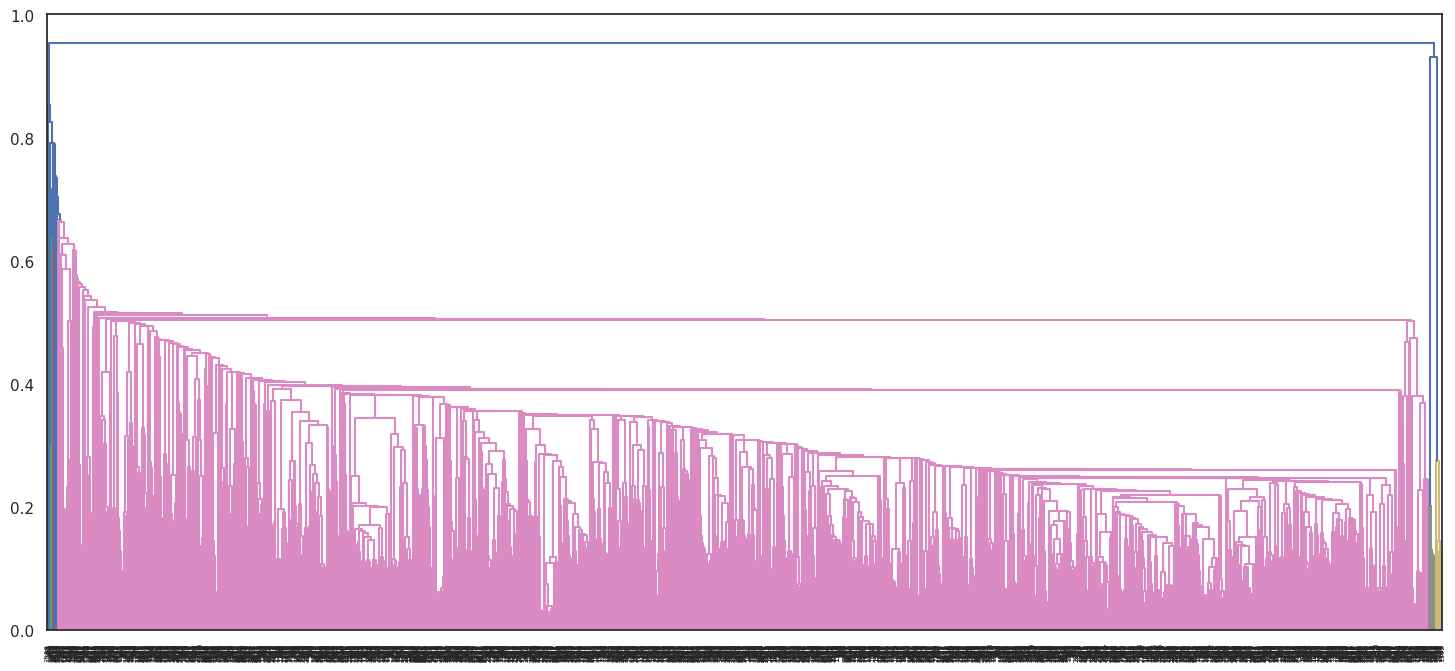

In [ ]:
import scipy.cluster.hierarchy as sch            
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method = 'single'))

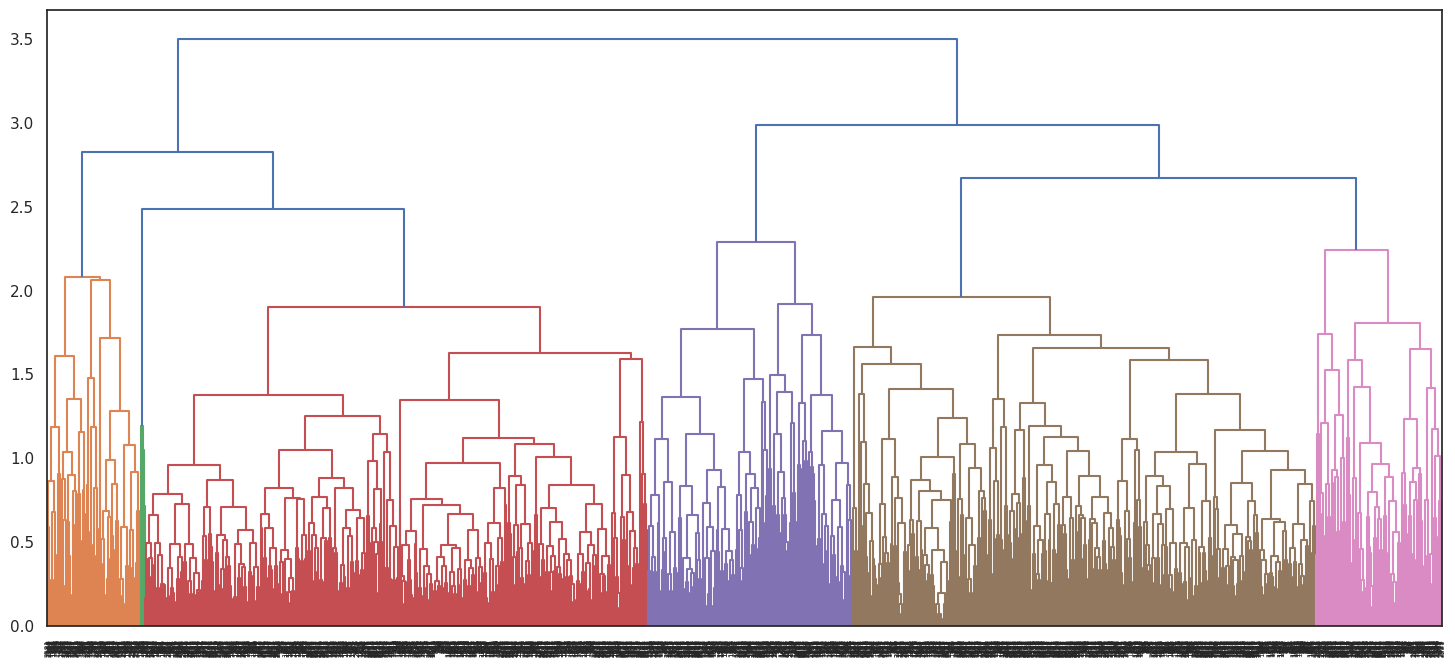

In [ ]:
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm1, method = 'complete'))

In [ ]:
# Creating clusters
hc = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean', linkage = 'complete')

In [ ]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
#Save clusters for chart
y_hc = hc.fit_predict(df_norm1)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
new_df['Clusterid_hc'] = Clusters

In [ ]:
new_df.groupby('Clusterid_hc').agg(['mean']).reset_index()

<ipython-input-51-6a82b84aa455>:1: FutureWarning: ['Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_df.groupby('Clusterid_hc').agg(['mean']).reset_index()


,Clusterid_hc,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_KM
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.014441,17091.362762,12758.665538,4.929242e+10,1028.002622,0.012589,0.402622,78.732517,73.069930,0.814627,0.229087,0.670920,0.099930,4.220234e+06,0.688407,1.886700e+09,1.121962e+09,0.353147
1,1,0.034175,7173.938900,11564.647658,1.053328e+10,102.687373,0.058784,0.047692,61.127291,57.919043,0.271079,0.409399,0.554958,0.035628,9.829856e+06,0.379428,4.787792e+08,2.420544e+08,2.668024
2,2,0.014688,121703.586902,52324.386965,2.199043e+11,1095.061713,0.013718,0.390428,77.833753,72.005038,0.807305,0.216781,0.672042,0.111060,3.912797e+07,0.690489,6.481325e+09,4.016186e+09,1.493703
3,3,0.024337,83680.031768,35016.059392,8.245463e+10,85.950276,0.039492,0.059669,69.983425,65.243094,0.255433,0.334602,0.617127,0.048326,3.691403e+07,0.512773,9.600939e+08,1.082849e+09,1.685083


In [ ]:
new_df['Clusterid_hc'].value_counts()

0    1144
1     982
2     397
3     181
Name: Clusterid_hc, dtype: int64

In [ ]:
print("Cluster 0 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc'] == 0].Country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc'] == 1].Country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc'] == 2].Country.unique())

print("Cluster 3 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc'] == 3].Country.unique())

Cluster 0 of Hierarchical Clustering model
['Mauritius' 'Seychelles' 'Armenia' 'Brunei Darussalam' 'Georgia'
 'Hong Kong SAR, China' 'Macao SAR, China' 'Singapore' 'Sri Lanka'
 'Albania' 'Andorra' 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Cyprus' 'Denmark' 'Estonia' 'Faeroe Islands' 'Finland'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Isle of Man' 'Kosovo' 'Latvia'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macedonia, FYR' 'Malta'
 'Moldova' 'Monaco' 'Montenegro' 'Norway' 'Portugal' 'Romania'
 'San Marino' 'Serbia' 'Slovak Republic' 'Slovenia' 'Sweden' 'Switzerland'
 'Bahrain' 'Israel' 'Kuwait' 'Lebanon' 'Qatar' 'United Arab Emirates'
 'American Samoa' 'French Polynesia' 'Guam' 'Marshall Islands'
 'New Caledonia' 'New Zealand' 'Antigua and Barbuda' 'Aruba'
 'Bahamas, The' 'Barbados' 'Bermuda' 'Cayman Islands' 'Chile' 'Costa Rica'
 'Cuba' 'Curacao' 'Dominica' 'Greenland' 'Grenada' 'Jamaica' 'Panama'
 'Puerto Rico' 'Sint Maarten (Dutch part)' 'St. Kitts and Nevis'
 'St. Luc

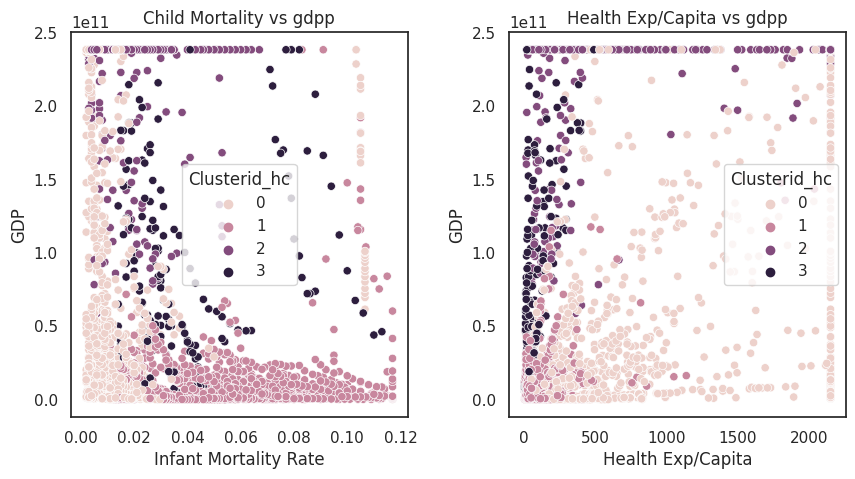

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# First subplot
sns.scatterplot(x='Infant Mortality Rate', y='GDP', hue='Clusterid_hc', data=new_df, ax=axs[0])
axs[0].set_title('Child Mortality vs gdpp')

# Second subplot
sns.scatterplot(x='Health Exp/Capita', y='GDP', hue='Clusterid_hc', data=new_df, ax=axs[1])
axs[1].set_title('Health Exp/Capita vs gdpp')

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

cluster 0 has high GDP and high infant mortality rate so it is less developed nation
Cluster 1 has high mortality rate and low GDP = Least developed country


# **PCA**

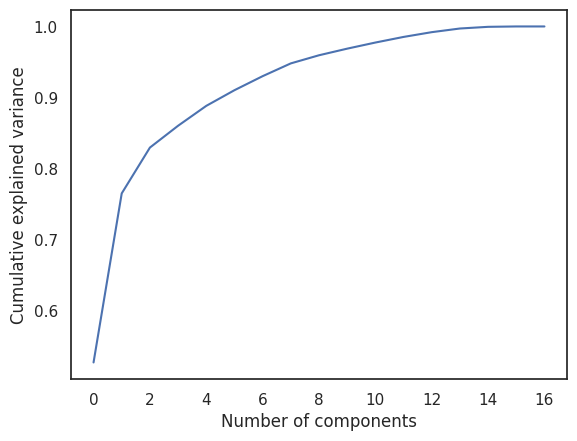

In [ ]:
from sklearn.decomposition import PCA

# Drop any non-numerical columns
df_numeric = new_df.select_dtypes(include=['float64', 'int64'])

# Instantiate PCA object with maximum number of components
pca = PCA()

# Fit the PCA model on the standardized data
pca.fit(df_norm1)

# Plot the scree plot to visualize the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


From above screen plot, Around 85% of the information is being explained by 4 components.


In [ ]:
# Extract the first 4 principal components
df_pca = pd.DataFrame(pca.transform(df_norm1)[:, :4], columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [ ]:
df_pca

,PC1,PC2,PC3,PC4
0,-0.196119,0.472784,-0.516772,-0.345320
1,-1.226840,0.711984,0.533007,-0.050660
2,-1.131973,0.374738,0.341758,0.029318
3,-0.902123,0.106527,0.154588,0.086270
4,-1.179441,0.606896,0.393625,-0.018770
...,...,...,...,...
2699,-0.002886,-0.976504,0.165253,-0.470193
2700,1.857604,0.290259,0.324207,-0.255260
2701,0.384450,-0.719833,0.099838,-0.074498
2702,0.788109,0.231716,-0.060447,-0.092912


# **Hopkins test for PCA**

In [ ]:
def hopkins(X):
    """
    Perform Hopkins statistic on a given dataset.
    """
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) # number of random points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    
    return H

# Perform Hopkins test
hopkins_statistic = hopkins(df_pca)
print("Hopkins Statistic:", hopkins_statistic)


Hopkins Statistic: 0.92123094796933


# 1) K-Means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

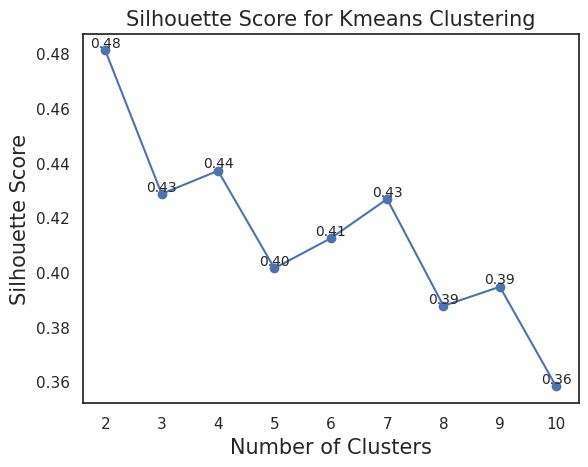

In [ ]:
from sklearn.metrics import silhouette_score

# Define the range of number of clusters to try
k_range = range(2, 11)

# Compute the silhouette scores for each number of clusters
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Plot the silhouette scores with markers for each point
plt.plot(k_range, silhouette_scores, marker='o')
for x, y in zip(k_range, silhouette_scores):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)
plt.title('Silhouette Score for Kmeans Clustering',fontsize=15)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Silhouette Score',fontsize=15)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

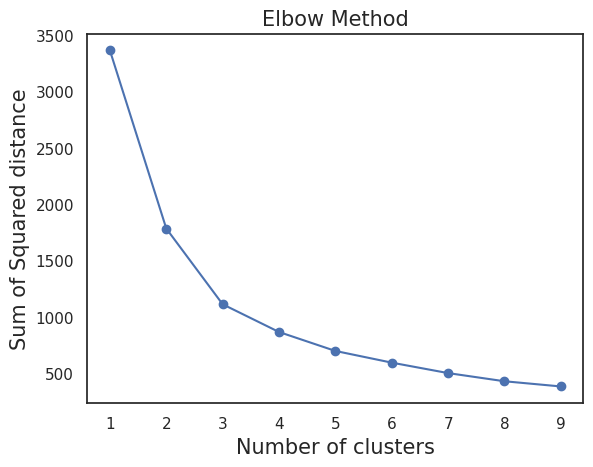

In [ ]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_pca)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [ ]:
# Build the cluster algorithmn
cluster_km1 = KMeans(n_clusters=4, max_iter=100, random_state = 42)
cluster_km1.fit_predict(df_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 3, 2, 3], dtype=int32)

In [ ]:
cluster_km1.labels_

array([1, 1, 1, ..., 3, 2, 3], dtype=int32)

In [ ]:
new_df['pca_clusterid_KM']=cluster_km1.labels_

In [ ]:
cluster_km1.cluster_centers_  #Giving the average values of centroids for all the features and for all the 4 clusters

array([[ 1.55076685, -0.03975085,  0.28496713,  0.03867752],
       [-0.82155562,  0.32295952,  0.12581017, -0.00176293],
       [ 0.82809236,  0.83553259, -0.27431248, -0.01296384],
       [-0.07311967, -0.54077028, -0.1296648 , -0.00819033]])

In [ ]:

new_df

,Country,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_KM,Clusterid_hc,pca_clusterid_KM
0,Algeria,0.020000,87931.0,26998.000,5.041749e+10,60.0,0.034,0.000000,71.0,67.0,...,0.342,0.619000,0.039000,3.171945e+07,0.599,1.020000e+08,1.930000e+08,3,3,1
1,Angola,0.050000,9542.0,7499.000,9.129595e+09,22.0,0.117,0.000000,47.0,44.0,...,0.476,0.499000,0.025000,1.392493e+07,0.324,3.400000e+07,1.460000e+08,3,1,1
2,Benin,0.043000,1617.0,1983.000,2.359122e+09,15.0,0.090,0.000000,57.0,53.0,...,0.454,0.517000,0.029000,6.949366e+06,0.383,7.700000e+07,5.000000e+07,3,1,1
3,Botswana,0.027000,4276.0,1836.000,5.788312e+09,152.0,0.054,0.000000,52.0,49.0,...,0.383,0.587000,0.029000,1.755375e+06,0.532,2.270000e+08,2.090000e+08,3,1,1
4,Burkina Faso,0.046000,1041.0,13489.000,2.610959e+09,12.0,0.096,0.000000,52.0,49.0,...,0.468,0.505000,0.028000,1.160794e+07,0.178,2.300000e+07,3.000000e+07,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,Turks and Caicos Islands,0.011667,160.0,78.000,2.741753e+09,2149.5,0.004,0.466667,82.0,76.0,...,0.291,0.638667,0.070333,3.242700e+04,0.911,5.036667e+08,1.403333e+08,0,0,3
2700,United States,0.013000,79142.0,55980.125,2.383416e+11,2149.5,0.006,0.800000,81.0,76.0,...,0.196,0.667000,0.136000,4.903473e+07,0.811,7.191000e+09,4.330250e+09,2,2,0
2701,Uruguay,0.015000,590.0,22263.000,5.000435e+10,1308.0,0.010,0.500000,80.0,74.0,...,0.220,0.639000,0.140000,3.395253e+06,0.948,2.222000e+09,1.028000e+09,0,0,3
2702,"Venezuela, RB",0.020000,79142.0,21639.000,2.383416e+11,593.0,0.013,0.500000,78.0,72.0,...,0.288,0.652000,0.060000,2.995478e+07,0.889,9.040000e+08,3.202000e+09,1,0,2


In [ ]:
new_df.groupby('pca_clusterid_KM').agg(['mean']).reset_index()

<ipython-input-66-22b0827aba7f>:1: FutureWarning: ['Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_df.groupby('pca_clusterid_KM').agg(['mean']).reset_index()


,pca_clusterid_KM,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_KM,Clusterid_hc
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.012016,80840.124668,39857.262931,2.132448e+11,1882.168435,0.008570,0.611848,81.970822,76.697613,1.050663,0.178151,0.679081,0.142541,2.139340e+07,0.801989,6.446968e+09,4.120662e+09,1.973475,1.066313
1,1,0.034825,10156.739726,12970.474974,1.113834e+10,83.442571,0.061638,0.036214,60.251844,57.243941,0.228346,0.414499,0.550999,0.034495,1.221777e+07,0.356921,4.198084e+08,2.302079e+08,2.996839,1.138040
2,2,0.019711,114970.494681,48257.291033,1.752537e+11,249.613982,0.025976,0.174873,72.984802,67.224924,0.575380,0.280711,0.653769,0.065514,4.079567e+07,0.596389,4.180009e+09,2.961931e+09,1.006079,2.072948
3,3,0.015493,11552.879886,9391.104028,1.938845e+10,816.285033,0.013776,0.334287,77.759771,71.979981,0.727137,0.245809,0.664443,0.089721,3.445530e+06,0.657571,1.116569e+09,5.388099e+08,0.002860,0.147760


In [ ]:
new_df['pca_clusterid_KM'].value_counts()

3    1049
1     949
0     377
2     329
Name: pca_clusterid_KM, dtype: int64

In [ ]:
print("Cluster 0 of KMeans model")
print(new_df[new_df['pca_clusterid_KM'] == 0].Country.unique())

print("Cluster 1 of KMeans model")
print(new_df[new_df['pca_clusterid_KM'] == 1].Country.unique())

print("Cluster 2 of KMeans model")
print(new_df[new_df['pca_clusterid_KM'] == 2].Country.unique())

print("Cluster 3 of KMeans model")
print(new_df[new_df['pca_clusterid_KM'] == 3].Country.unique())

Cluster 0 of KMeans model
['Hong Kong SAR, China' 'Japan' 'Korea, Dem. Rep.' 'Singapore' 'Austria'
 'Belgium' 'Denmark' 'France' 'Germany' 'Greece' 'Italy' 'Netherlands'
 'Norway' 'Portugal' 'Spain' 'Sweden' 'Switzerland' 'United Kingdom'
 'Israel' 'Australia' 'Canada' 'United States' 'Finland' 'Ireland'
 'Korea, Rep.' 'South Sudan' 'Czech Republic' 'United Arab Emirates'
 'New Zealand' 'Hungary' 'Luxembourg' 'Poland' 'Kuwait' 'Saudi Arabia'
 'Argentina' 'Chile' 'Macao SAR, China' 'Malaysia' 'Russian Federation'
 'Qatar' 'Brazil' 'Lebanon']
Cluster 1 of KMeans model
['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Equatorial Guinea' 'Eritrea'
 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Morocco'
 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Pri

# 2) Hierarchical Clustering

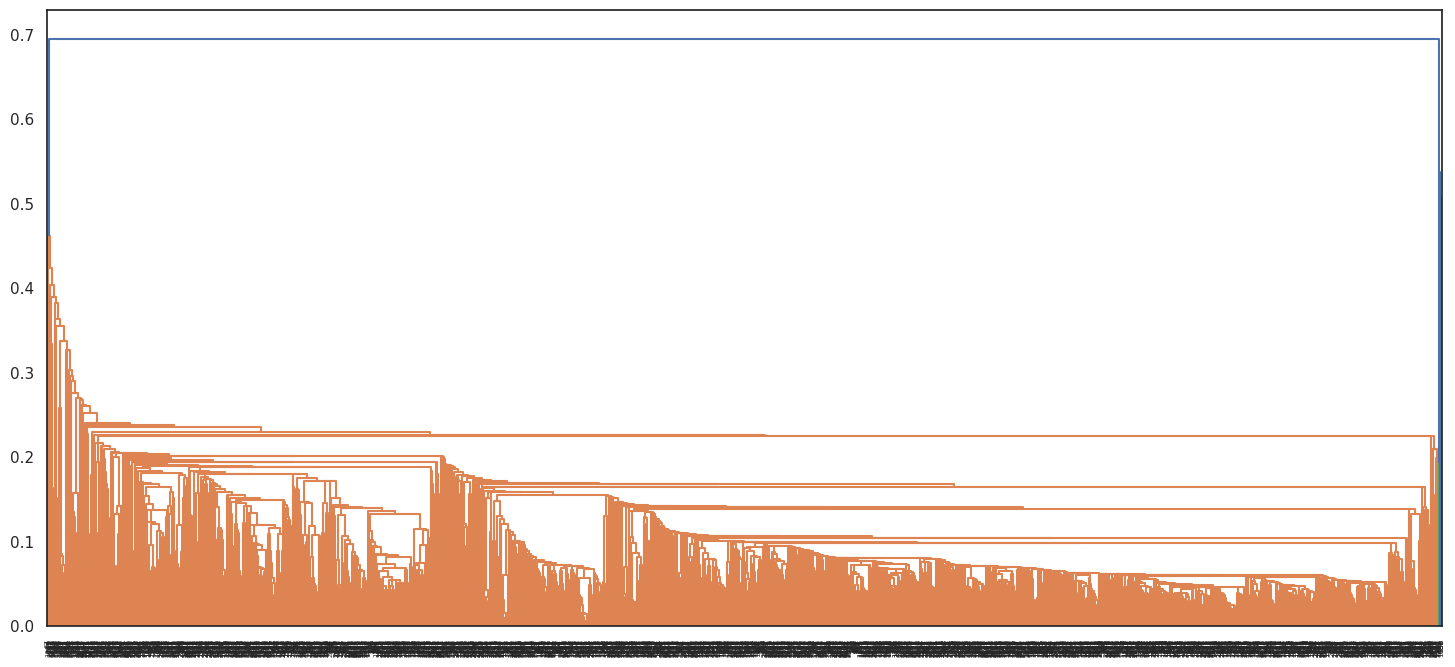

In [ ]:

plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'single'))

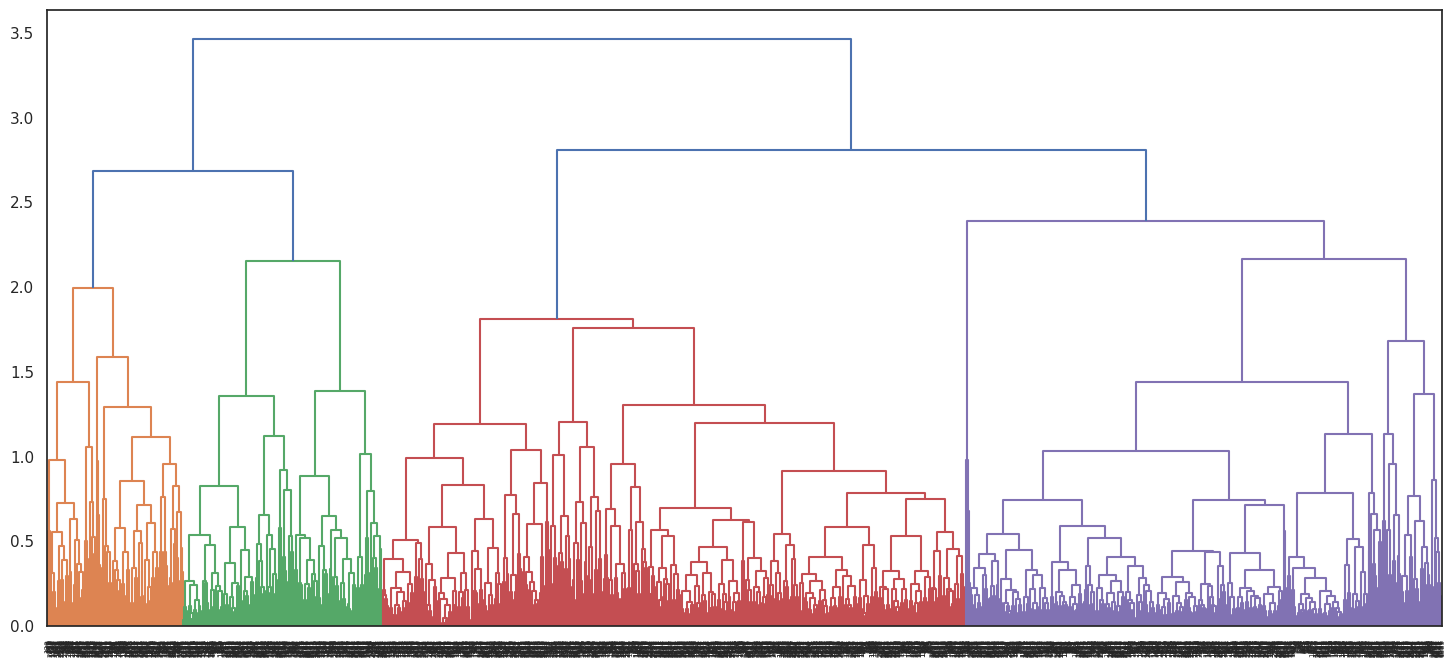

In [ ]:
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'complete'))

In [ ]:
hc1 = AgglomerativeClustering(n_clusters = 4 , affinity = 'euclidean', linkage = 'complete')

In [ ]:
#Save clusters for chart
y_hc1 = hc1.fit_predict(df_pca)
Clusters1 = pd.DataFrame(y_hc1, columns=['Clusters'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
new_df['Clusterid_hc_pca'] = Clusters1

In [ ]:
new_df['Clusterid_hc_pca'].value_counts()

2    1131
0     924
1     386
3     263
Name: Clusterid_hc_pca, dtype: int64

In [ ]:
new_df.groupby('Clusterid_hc_pca').agg(['mean']).reset_index()

<ipython-input-75-fa08df810060>:1: FutureWarning: ['Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_df.groupby('Clusterid_hc_pca').agg(['mean']).reset_index()


,Clusterid_hc_pca,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_KM,Clusterid_hc,pca_clusterid_KM
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.035400,11772.955628,13929.719021,1.587887e+10,87.294372,0.063484,0.039502,59.557359,56.720238,...,0.417817,0.548280,0.033893,1.322783e+07,0.351115,4.667231e+08,3.055988e+08,2.918831,1.149351,1.035714
1,1,0.011878,83727.700777,41230.314443,2.160322e+11,1833.283679,0.008355,0.610622,81.945596,76.494819,...,0.178016,0.681105,0.140663,2.344523e+07,0.801870,6.629697e+09,4.132500e+09,1.867876,1.181347,0.212435
2,2,0.015901,14370.272325,10269.997569,2.415137e+10,780.523431,0.014374,0.322252,77.576481,71.833775,...,0.249706,0.662256,0.088013,4.108416e+06,0.654851,1.159013e+09,6.193097e+08,0.183024,0.201592,2.834660
3,3,0.019152,116387.282319,48143.561787,1.657218e+11,213.273764,0.025023,0.139037,73.243346,67.235741,...,0.279608,0.655791,0.064597,4.097765e+07,0.579787,4.084601e+09,2.789681e+09,1.129278,2.178707,1.935361


In [ ]:
print("Cluster 0 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc_pca'] == 0].Country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc_pca'] == 1].Country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc_pca'] == 2].Country.unique())

print("Cluster 3 of Hierarchical Clustering model")
print(new_df[new_df['Clusterid_hc_pca'] == 3].Country.unique())

Cluster 0 of Hierarchical Clustering model
['Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria'
 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Sierra Leone' 'Somalia'
 'South Africa' 'South Sudan' 'Sudan' 'Swaziland' 'Tanzania' 'Togo'
 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan' 'Bangladesh' 'Bhutan'
 'Cambodia' 'Kyrgyz Republic' 'Lao PDR' 'Maldives' 'Mongolia' 'Myanmar'
 'Nepal' 'Pakistan' 'Tajikistan' 'Timor-Leste' 'Turkmenistan' 'Iraq'
 'Jordan' 'Yemen, Rep.' 'Fiji' 'Kiribati' 'Micronesia, Fed. Sts.'
 'Papua New Guinea' 'Samoa' 'Solomon Islands' 'Tonga' 'Vanuatu' 'Belize'
 'Bolivia' 'El Salvador' 'Guatemala' 'Guyana' 'Haiti' 'Honduras'
 'Nicarag

In [ ]:
new_df.columns

Index(['Country', 'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'clusterid_KM', 'Clusterid_hc', 'pca_clusterid_KM',
       'Clusterid_hc_pca'],
      dtype='object')

# **Scatter Plot**

### Final Model is kMeans model

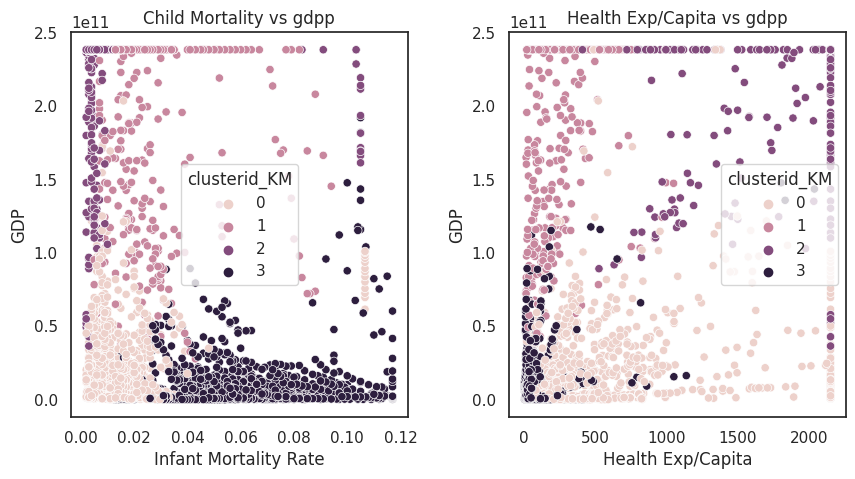

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# First subplot
sns.scatterplot(x='Infant Mortality Rate', y='GDP', hue='clusterid_KM', data=new_df, ax=axs[0])
axs[0].set_title('Child Mortality vs gdpp')

# Second subplot
sns.scatterplot(x='Health Exp/Capita', y='GDP', hue='clusterid_KM', data=new_df, ax=axs[1])
axs[1].set_title('Health Exp/Capita vs gdpp')

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

Cluster 0: Low GDP and Low infant mortality rate and Low Health Exp/Capita.

Cluster 1: High GDP and Low infant mortality rate and High Health Exp/Capita.

Cluster 2: High GDP and Low infant mortality rate and High Health Exp/Capita.

Cluster 1: Low GDP and high infant mortality rate and Low Health Exp/Capita.

Cluster 0: Less developed country

Cluster 1: More Developed Country

Cluster 2: Most Developed Country

Cluster 3: Least Developed Country

In [ ]:
import pickle

In [ ]:
pickle.dump(cluster_km, open('cluster_km.pkl','wb'))
